In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests

def get_keys(path):
    with open(path) as f:
        return json.load(f)

Ran pip install baseball_scraper in Terminal

In [2]:
from baseball_scraper import pitching_stats
from baseball_scraper import baseball_reference
tss = baseball_reference.TeamSummaryScraper()
df = tss.scrape(2019)
df.columns

Index(['Franchise', 'abbrev', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP',
       'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'],
      dtype='object')

In [3]:
s = baseball_reference.TeamScraper()
s.set_season(2005)
sox_05 = s.scrape('CHW')
sox_05.head(2)

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,2005-04-04,CHW,Home,CLE,W,1.0,0.0,9.0,1-0,1.0,Tied,Buehrle,Westbrook,Takatsu,1:51,D,38141.0,1.08,1,None
2,2005-04-06,CHW,Home,CLE,W-wo,4.0,3.0,9.0,2-0,1.0,up 0.5,Marte,Wickman,None,2:55,D,10520.0,1.17,2,None


In [4]:
from baseball_scraper import standings

In [5]:
standings_11 = standings(2011)[1]
print(standings_11)

                   Tm   W   L  W-L%    GB
1      Detroit Tigers  95  67  .586    --
2   Cleveland Indians  80  82  .494  15.0
3   Chicago White Sox  79  83  .488  16.0
4  Kansas City Royals  71  91  .438  24.0
5     Minnesota Twins  63  99  .389  32.0


In [6]:
standings_11.head(1)

,Tm,W,L,W-L%,GB
1,Detroit Tigers,95,67,.586,--


In [7]:
standings_11 = standings(2011)[1]
leader_11=standings_11.head(1)
leader_11.insert(0, 'Year', [2011], True) 

In [8]:
standings_12 = standings(2012)[1]
leader_12=standings_12.head(1)
leader_12.insert(0, 'Year', [2012], True) 

In [9]:
standings_13 = standings(2013)[1]
leader_13=standings_13.head(1)
leader_13.insert(0, 'Year', [2013], True) 

In [10]:
standings_14 = standings(2014)[1]
leader_14=standings_14.head(1)
leader_14.insert(0, 'Year', [2014], True) 

In [11]:
standings_15 = standings(2015)[1]
leader_15=standings_15.head(1)
leader_15.insert(0, 'Year', [2015], True) 

In [12]:
standings_16 = standings(2016)[1]
leader_16=standings_16.head(1)
leader_16.insert(0, 'Year', [2016], True) 

In [13]:
standings_17 = standings(2017)[1]
leader_17=standings_17.head(1)
leader_17.insert(0, 'Year', [2017], True) 

In [14]:
standings_18 = standings(2018)[1]
leader_18=standings_18.head(1)
leader_18.insert(0, 'Year', [2018], True) 

In [15]:
standings_19 = standings(2019)[1]
leader_19=standings_19.head(1)
leader_19.insert(0, 'Year', [2019], True) 

In [16]:
standings_20 = standings(2020)[1]
leader_20=standings_20.head(1)
leader_20.insert(0, 'Year', [2020], True) 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html for combination of dataframes.

In [17]:
leaders=pd.concat([leader_20, leader_19, leader_18, leader_17, leader_16, leader_15,
           leader_14, leader_13, leader_12, leader_11], ignore_index=True)

In [18]:
leaders.rename(columns = {'W-L%':'Win_Pct'}, inplace = True)
leaders.rename(columns = {'Tm':'Team'}, inplace = True)

In [19]:
leaders['Win_Pct']=leaders['Win_Pct'].astype(float)
leaders['W']=leaders['W'].astype(int)
leaders['L']=leaders['L'].astype(int)

In [20]:
leaders

,Year,Team,W,L,Win_Pct,GB
0,2020,Minnesota Twins,36,24,0.600,--
1,2019,Minnesota Twins,101,61,0.623,--
2,2018,Cleveland Indians,91,71,0.562,--
3,2017,Cleveland Indians,102,60,0.630,--
4,2016,Cleveland Indians,94,67,0.584,--
5,2015,Kansas City Royals,95,67,0.586,--
6,2014,Detroit Tigers,90,72,0.556,--
7,2013,Detroit Tigers,93,69,0.574,--
8,2012,Detroit Tigers,88,74,0.543,--
9,2011,Detroit Tigers,95,67,0.586,--


In [21]:
leaders.Win_Pct.describe()

count    10.000000
mean      0.584400
std       0.027786
min       0.543000
25%       0.565000
50%       0.585000
75%       0.596500
max       0.630000
Name: Win_Pct, dtype: float64

To win the division, a winning percentage of around 58% is usually sufficient. This requires roughly 94 wins in a 162-game season, or 46 wins above replacement among all players on a team, as a replacement-level team would normally win about 48 games.

In [22]:
from baseball_scraper import statcast
pitching_metrics = statcast(start_dt='2020-07-24', end_dt='2020-07-25')
pitching_metrics.head(2)

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,405,CH,2020-07-25,82.0,-2.75,3.89,Mychal Givens,646240.0,571710.0,strikeout,...,2.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,Infield shift,Standard
1,423,FF,2020-07-25,94.1,-2.64,4.43,Mychal Givens,646240.0,571710.0,NaN,...,2.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,Infield shift,Standard


In [23]:
#Finding Player IDs. Can be tied to other dataframes later on.
from baseball_scraper import playerid_lookup
from baseball_scraper import statcast_pitcher
#Looking up a player to make sure this works.
playerid_lookup('Jimenez', 'Eloy')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,jimenez,eloy,650391,jimee001,jimenel02,17484,2019.0,2020.0


In [24]:
from baseball_scraper import batting_stats_range

In [25]:
#Note that players' mlb_IDs in this table can be tied to key_mlbam
#in the previous sample player lookups.
batting_data_2020=batting_stats_range('2020-07-24', '2020-09-30')
batting_data_2020.head(3)

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlb_ID
1,José Abreu,33,143,MLB-AL,Chicago,60,262,240,43,76,...,0,1,10,0,0,0.317,0.370,0.617,0.987,547989
2,Ronald Acuna Jr.,22,144,MLB-NL,Atlanta,46,202,160,46,40,...,0,0,3,8,1,0.250,0.406,0.581,0.987,660670
3,Willy Adames,24,144,MLB-AL,Tampa Bay,54,205,185,29,48,...,0,0,4,2,1,0.259,0.332,0.481,0.813,642715


In [26]:
#Beginning date must be 2008 or later.
batting_data=batting_stats_range('2008-03-30', '2020-10-01')
batting_data.head(3)

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlb_ID
1,David Aardsma,33,2055,"MLB-NL,MLB-AL","Atlanta,Boston",2,2,2,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,430911
2,Fernando Abad,30,1760,"MLB-NL,MLB-AL","Houston,Minnesota",7,9,9,0,1,...,0,0,1,0,0,0.111,0.111,0.111,0.222,472551
3,Reggie Abercrombie,27,4525,MLB-NL,Houston,32,60,55,10,17,...,1,1,0,5,2,0.309,0.339,0.509,0.848,430631


In [27]:
batting_data.columns

Index(['Name', 'Age', '#days', 'Lev', 'Tm', 'G', 'PA', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB',
       'CS', 'BA', 'OBP', 'SLG', 'OPS', 'mlb_ID'],
      dtype='object')

https://openbase.com/python/baseball-scraper/documentation

In [28]:
from baseball_scraper import pitching_stats_range
from baseball_scraper import pitching_stats_bref
from baseball_scraper import pitching_stats
pitching_data=pitching_stats_range('2008-03-30', '2020-10-01')
pitching_data.head(3)

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,Str,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W
1,David Aardsma,33,2005,"MLB-NL,MLB-AL","Atlanta,Seattle,New York,Boston",249,0,10.0,17.0,69.0,...,0.61,0.15,0.12,0.33,0.25,0.08,1.350,0.279,9.3,1.93
2,Fernando Abad,33,508,"MLB-AL,MLB-NL","Oakland,Boston,Houston,Minnesota,San Francisco...",384,6,8.0,29.0,2.0,...,0.64,0.19,0.09,0.42,0.22,0.10,1.285,0.283,7.6,2.41
3,Albert Abreu,24,167,MLB-AL,New York,2,0,NaN,1.0,NaN,...,0.56,0.14,0.09,0.33,0.33,0.00,4.500,0.600,13.5,1.00


In [29]:
pitching_bref_17=pitching_stats_bref(2017)

In [30]:
pitching_data.columns

Index(['Name', 'Age', '#days', 'Lev', 'Tm', 'G', 'GS', 'W', 'L', 'SV', 'IP',
       'H', 'R', 'ER', 'BB', 'SO', 'HR', 'HBP', 'ERA', 'AB', '2B', '3B', 'IBB',
       'GDP', 'SF', 'SB', 'CS', 'PO', 'BF', 'Pit', 'Str', 'StL', 'StS',
       'GB/FB', 'LD', 'PU', 'WHIP', 'BAbip', 'SO9', 'SO/W'],
      dtype='object')

In [31]:
pitching_bref_17.columns

Index(['Name', 'Age', '#days', 'Lev', 'Tm', 'G', 'GS', 'W', 'L', 'SV', 'IP',
       'H', 'R', 'ER', 'BB', 'SO', 'HR', 'HBP', 'ERA', 'AB', '2B', '3B', 'IBB',
       'GDP', 'SF', 'SB', 'CS', 'PO', 'BF', 'Pit', 'Str', 'StL', 'StS',
       'GB/FB', 'LD', 'PU', 'WHIP', 'BAbip', 'SO9', 'SO/W'],
      dtype='object')

Since we have Player IDs for hitters, we can combine the table with the traditional stats with the table with the WAR for them. Pitchers, however, do not seem to have their IDs listed in their traditional stats table. As a result, it appears we will need to scrape FanGraphs for that.

See: https://www.smartfantasybaseball.com/2020/12/everything-you-need-to-know-about-the-player-id-map/

In [32]:
#We might not need FanGraphs, but it could come in handy.
from baseball_scraper import fangraphs

In [33]:
player_ids=pd.read_csv('playeridmap.csv')

In [34]:
player_ids.columns

Index(['IDPLAYER', 'PLAYERNAME', 'BIRTHDATE', 'FIRSTNAME', 'LASTNAME', 'TEAM',
       'LG', 'POS', 'IDFANGRAPHS', 'FANGRAPHSNAME', 'MLBID', 'MLBNAME',
       'CBSID', 'CBSNAME', 'RETROID', 'BREFID', 'NFBCID', 'NFBCNAME', 'ESPNID',
       'ESPNNAME', 'KFFLNAME', 'DAVENPORTID', 'BPID', 'YAHOOID', 'YAHOONAME',
       'MSTRBLLNAME', 'BATS', 'THROWS', 'FANTPROSNAME', 'LASTCOMMAFIRST',
       'ROTOWIREID', 'FANDUELNAME', 'FANDUELID', 'DRAFTKINGSNAME', 'OTTONEUID',
       'HQID', 'RAZZBALLNAME', 'FANTRAXID', 'FANTRAXNAME', 'ROTOWIRENAME',
       'ALLPOS', 'NFBCLASTFIRST', 'ACTIVE'],
      dtype='object')

In [35]:
player_ids=player_ids[['PLAYERNAME','MLBID','BREFID','IDFANGRAPHS', 'BIRTHDATE', 'FIRSTNAME', 'LASTNAME', 'TEAM',
       'LG','IDPLAYER', 'POS', 'FANGRAPHSNAME',
       'CBSID', 'CBSNAME', 'RETROID', 'NFBCID', 'NFBCNAME', 'ESPNID',
       'ESPNNAME', 'KFFLNAME', 'DAVENPORTID', 'BPID','MLBNAME','YAHOOID', 'YAHOONAME',
       'MSTRBLLNAME', 'BATS', 'THROWS', 'FANTPROSNAME', 'LASTCOMMAFIRST',
       'ROTOWIREID', 'FANDUELNAME', 'FANDUELID', 'DRAFTKINGSNAME', 'OTTONEUID',
       'HQID', 'RAZZBALLNAME', 'FANTRAXID', 'FANTRAXNAME', 'ROTOWIRENAME',
       'ALLPOS', 'NFBCLASTFIRST', 'ACTIVE']]
player_ids.head(2)

,PLAYERNAME,MLBID,BREFID,IDFANGRAPHS,BIRTHDATE,FIRSTNAME,LASTNAME,TEAM,LG,IDPLAYER,...,DRAFTKINGSNAME,OTTONEUID,HQID,RAZZBALLNAME,FANTRAXID,FANTRAXNAME,ROTOWIRENAME,ALLPOS,NFBCLASTFIRST,ACTIVE
0,David Aardsma,430911.0,aardsda01,1902,12/27/1981,David,Aardsma,NaN,NaN,aardsda01,...,David Aardsma,4362.0,NaN,David Aardsma,NaN,NaN,David Aardsma,P,"Aardsma, David",N
1,Fernando Abad,472551.0,abadfe01,4994,12/17/1985,Fernando,Abad,BAL,AL,abadfe01,...,Fernando Abad,7372.0,3556.0,Fernando Abad,*01viz*,Fernando Abad,Fernando Abad,P,"Abad, Fernando",Y


The player_ids dataframe will allow us to merge tables to either MLBID or BREFID.

Would like to be able to use WAR as a dependent variable, but that statistic was not in one of the earlier tables.

Try these instead:
https://www.baseball-reference.com/data/war_daily_pitch.txt
https://www.baseball-reference.com/data/war_daily_bat.txt

In [36]:
pitchers=pd.read_csv('pitchers.txt')

In [37]:
pitchers.columns

Index(['name_common', 'age', 'mlb_ID', 'player_ID', 'year_ID', 'team_ID',
       'stint_ID', 'lg_ID', 'G', 'GS', 'IPouts', 'IPouts_start',
       'IPouts_relief', 'RA', 'xRA', 'xRA_sprp_adj', 'xRA_extras_adj',
       'xRA_def_pitcher', 'PPF', 'PPF_custom', 'xRA_final', 'BIP', 'BIP_perc',
       'RS_def_total', 'runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'RpO_replacement', 'GR_leverage_index_avg', 'WAR',
       'salary', 'teamRpG', 'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA',
       'WAA_adj', 'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep',
       'WAR_rep', 'ERA_plus', 'ER_lg'],
      dtype='object')

In [38]:
#Rearranging columns to have certain ones appear near the beginning.
pitchers=pitchers[['name_common','player_ID','mlb_ID','WAR','G','age','year_ID','ERA_plus','ER_lg','RA','xRA','BIP','team_ID',
       'stint_ID', 'lg_ID', 'GS', 'IPouts', 'IPouts_start',
       'IPouts_relief', 'xRA_sprp_adj', 'xRA_extras_adj',
       'xRA_def_pitcher', 'PPF', 'PPF_custom', 'xRA_final', 'BIP_perc',
       'RS_def_total', 'runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'RpO_replacement', 'GR_leverage_index_avg',
       'salary', 'teamRpG', 'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA',
       'WAA_adj', 'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep',
       'WAR_rep']]

In [39]:
pitchers.head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,year_ID,ERA_plus,ER_lg,RA,...,teamRpG,oppRpG,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep
0,David Aardsma,aardsda01,430911.0,-0.15,11,22.0,2004,66.675000,5.334,8,...,4.67092,4.86883,1.902,0.4803,-0.2167,-0.0298,4.75633,1.895,0.4914,0.0942
1,David Aardsma,aardsda01,430911.0,0.61,45,24.0,2006,114.295833,27.431,25,...,4.86675,4.80561,1.909,0.5060,0.2700,-0.1301,4.97303,1.919,0.4896,0.4682


In [40]:
#Example on how to merge the traditional and advanced stats dataframes.
#df_gross_basics=df_basics.merge(df_gross, left_on='primary_title',right_on='title')
#df_gross_basics.sort_values(['domestic_gross'], ascending=False)

In [41]:
batters=pd.read_csv('batters.txt')

In [42]:
batters.columns

Index(['name_common', 'age', 'mlb_ID', 'player_ID', 'year_ID', 'team_ID',
       'stint_ID', 'lg_ID', 'PA', 'G', 'Inn', 'runs_bat', 'runs_br', 'runs_dp',
       'runs_field', 'runs_infield', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_defense', 'runs_position', 'runs_position_p',
       'runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def',
       'WAR', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary', 'pitcher', 'teamRpG',
       'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'OPS_plus', 'TOB_lg', 'TB_lg'],
      dtype='object')

In [43]:
batters=batters[['name_common','player_ID','mlb_ID','WAR','G','age','OPS_plus','year_ID','team_ID',
       'stint_ID', 'lg_ID', 'PA', 'Inn', 'runs_bat', 'runs_br', 'runs_dp',
       'runs_field', 'runs_infield', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_defense', 'runs_position', 'runs_position_p',
       'runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary', 'pitcher', 'teamRpG',
       'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg', 'TB_lg']]

In [44]:
pitchers.sort_values(['WAR'], ascending=[False]).head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,year_ID,ERA_plus,ER_lg,RA,...,teamRpG,oppRpG,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep
14601,Pud Galvin,galvipu01,114552.0,20.48,72,27.0,1884,155.404965,219.121,254,...,5.23071,3.10569,1.830,0.7219,15.9768,-1.4661,6.19979,2.002,0.4157,5.9687
22172,Tim Keefe,keefeti01,116888.0,19.88,68,26.0,1883,144.913855,240.557,244,...,5.63716,3.13419,1.857,0.7484,16.8912,-0.7007,6.27728,2.026,0.4457,3.6905


In [45]:
batters.sort_values(['WAR'], ascending=[False]).head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,OPS_plus,year_ID,team_ID,stint_ID,...,oppRpPA_rep,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg
84980,Babe Ruth,ruthba01,121578.0,14.07,152,28.0,239.1529,1923,NYY,1,...,0.08144,4.61948,1.941,1.894,0.5763,0.5640,0.5080,0.4834,252.509,211.045
84978,Babe Ruth,ruthba01,121578.0,12.82,152,26.0,238.6033,1921,NYY,1,...,0.08845,4.94556,1.977,1.931,0.5680,0.5643,0.4996,0.4841,253.690,229.122


In [46]:
pitchers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48477 entries, 0 to 48476
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name_common            48477 non-null  object 
 1   player_ID              48477 non-null  object 
 2   mlb_ID                 48461 non-null  float64
 3   WAR                    48282 non-null  float64
 4   G                      48477 non-null  int64  
 5   age                    48446 non-null  float64
 6   year_ID                48477 non-null  int64  
 7   ERA_plus               47018 non-null  float64
 8   ER_lg                  48477 non-null  float64
 9   RA                     48477 non-null  int64  
 10  xRA                    48477 non-null  float64
 11  BIP                    48477 non-null  int64  
 12  team_ID                48477 non-null  object 
 13  stint_ID               48477 non-null  int64  
 14  lg_ID                  48341 non-null  object 
 15  GS

In [47]:
batters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108014 entries, 0 to 108013
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name_common         108014 non-null  object 
 1   player_ID           108014 non-null  object 
 2   mlb_ID              107966 non-null  float64
 3   WAR                 100212 non-null  float64
 4   G                   108014 non-null  int64  
 5   age                 107865 non-null  float64
 6   OPS_plus            91135 non-null   float64
 7   year_ID             108014 non-null  int64  
 8   team_ID             108014 non-null  object 
 9   stint_ID            108014 non-null  int64  
 10  lg_ID               107278 non-null  object 
 11  PA                  108014 non-null  int64  
 12  Inn                 71758 non-null   float64
 13  runs_bat            108014 non-null  float64
 14  runs_br             108014 non-null  float64
 15  runs_dp             108014 non-nul

In [48]:
#Filtering by Chicago White Sox pitchers.
pitchers_chw=pitchers[pitchers.team_ID=='CHW']

In [49]:
batters_chw=batters[batters.team_ID=='CHW']

In [50]:
pitchers_chw.sort_values(['WAR'], ascending=[False]).head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,year_ID,ERA_plus,ER_lg,RA,...,teamRpG,oppRpG,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep
47704,Wilbur Wood,woodwi01,124543.0,11.75,44,29.0,1971,188.733803,134.001,95,...,3.87468,2.35256,1.684,0.6985,8.7340,-0.0932,4.48863,1.832,0.4330,3.1078
12587,Red Faber,faberre01,113965.0,11.42,43,32.0,1921,169.609890,154.345,107,...,5.11154,3.31096,1.835,0.6893,8.1399,-0.0720,6.03387,1.988,0.4183,3.3527


In [51]:
batters_chw.sort_values(['WAR'], ascending=[False]).head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,OPS_plus,year_ID,team_ID,stint_ID,...,oppRpPA_rep,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg
18664,Eddie Collins,collied01,112506.0,9.35,155,28.0,164.8894,1915,CHW,1,...,0.06479,3.80076,1.824,1.793,0.5441,0.5353,0.5090,0.4816,217.558,176.827
1186,Dick Allen,allendi01,110157.0,8.60,148,30.0,198.9309,1972,CHW,1,...,0.05508,3.32051,1.762,1.726,0.5429,0.5440,0.4921,0.4813,194.271,182.464


In [52]:
best_chw_seasons=batters_chw.sort_values(['WAR'], ascending=[False]).head(25)

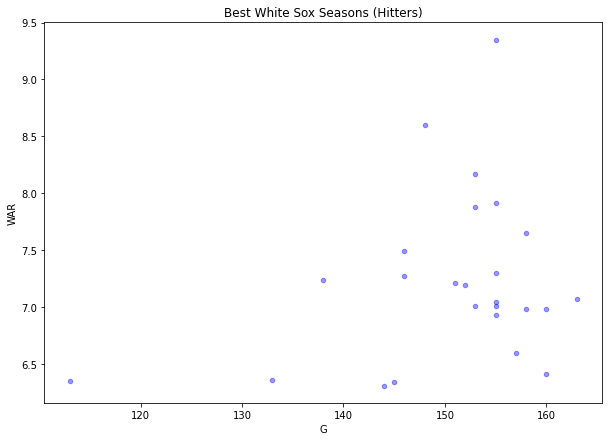

In [53]:
fig, ax = plt.subplots(figsize=(10,7))
best_chw_seasons.plot(kind='scatter', x='G', y='WAR', title='Best White Sox Seasons (Hitters)', ax=ax, alpha=0.4, color='b')

For height/weight info, see People.csv in http://www.seanlahman.com/baseball-archive/statistics/.

In [54]:
player_table=pd.read_csv('People.csv')

In [55]:
player_table.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [56]:
player_table=player_table[['playerID','height','weight','nameFirst', 'nameLast','birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity',
       'nameGiven', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID']]
player_table.head(2)

,playerID,height,weight,nameFirst,nameLast,birthYear,birthMonth,birthDay,birthCountry,birthState,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,75.0,215.0,David,Aardsma,1981.0,12.0,27.0,USA,CO,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,72.0,180.0,Hank,Aaron,1934.0,2.0,5.0,USA,AL,...,USA,NaN,NaN,Henry Louis,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01


In [57]:
#Add some new columns with sample data, which we will change in a moment to reflect the actual values.
player_table.insert(3, 'BMI', 23, True)
player_table.insert(3, 'weight_kg', 80, True)
player_table.insert(3, 'height_m', 1.85, True)

In [58]:
#Converting height from inches to meters, weight from pounds to kilograms, calculating BMI.
player_table['height_m']=player_table['height']*2.54/100
player_table['weight_kg']=player_table['weight']/2.20462
player_table['BMI']=player_table['weight_kg']/player_table['height_m']**2
player_table=player_table.drop(columns=['height','weight'])
player_table.head(2)

,playerID,height_m,weight_kg,BMI,nameFirst,nameLast,birthYear,birthMonth,birthDay,birthCountry,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1.9050,97.522476,26.872914,David,Aardsma,1981.0,12.0,27.0,USA,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1.8288,81.646724,24.412167,Hank,Aaron,1934.0,2.0,5.0,USA,...,USA,NaN,NaN,Henry Louis,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01


In [59]:
all_batters=batters.merge(player_table, left_on='player_ID',right_on='playerID')

In [60]:
all_pitchers=pitchers.merge(player_table, left_on='player_ID',right_on='playerID')

In [61]:
all_batters.shape

(106922, 74)

In [62]:
all_pitchers.shape

(47993, 68)

In [63]:
#Dropping all rows where OPS_plus is NaN, since a null OPS_plus indicates that the player did not bat that season.
all_batters=all_batters.dropna(subset=['OPS_plus'])
#Dropping all rows where ERA_plus is NaN, since a null ERA_plus indicates that the player did not pitch that season.
all_pitchers=all_pitchers.dropna(subset=['ERA_plus'])

In [64]:
all_batters.shape

(90200, 74)

In [65]:
all_pitchers.shape

(46551, 68)

In [66]:
all_batters.columns

Index(['name_common', 'player_ID', 'mlb_ID', 'WAR', 'G', 'age', 'OPS_plus',
       'year_ID', 'team_ID', 'stint_ID', 'lg_ID', 'PA', 'Inn', 'runs_bat',
       'runs_br', 'runs_dp', 'runs_field', 'runs_infield', 'runs_outfield',
       'runs_catcher', 'runs_good_plays', 'runs_defense', 'runs_position',
       'runs_position_p', 'runs_replacement', 'runs_above_rep',
       'runs_above_avg', 'runs_above_avg_off', 'runs_above_avg_def', 'WAA',
       'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary',
       'pitcher', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg', 'playerID', 'height_m', 'weight_kg', 'BMI', 'nameFirst',
       'nameLast', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameGiven

In [67]:
all_pitchers.columns

Index(['name_common', 'player_ID', 'mlb_ID', 'WAR', 'G', 'age', 'year_ID',
       'ERA_plus', 'ER_lg', 'RA', 'xRA', 'BIP', 'team_ID', 'stint_ID', 'lg_ID',
       'GS', 'IPouts', 'IPouts_start', 'IPouts_relief', 'xRA_sprp_adj',
       'xRA_extras_adj', 'xRA_def_pitcher', 'PPF', 'PPF_custom', 'xRA_final',
       'BIP_perc', 'RS_def_total', 'runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'RpO_replacement', 'GR_leverage_index_avg', 'salary',
       'teamRpG', 'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA', 'WAA_adj',
       'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep', 'WAR_rep',
       'playerID', 'height_m', 'weight_kg', 'BMI', 'nameFirst', 'nameLast',
       'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry',
       'deathState', 'deathCity', 'nameGiven', 'bats', 'throws', 'debut',
       'finalGame', 'retroID', 'bbrefID'],
      dtype='object')

Consider creating WAR after age 30, WAR after age 35 columns.

On a related note, consider creating dataframes for pitchers and hitters that are a groupby of the players. That way, we can view career WAR totals instead of having everything split up by season.

We also will want the traditional stats like BA, OBP, SLG, ERA, W, SV, etc. in the combined table. Merge those earlier tables. Please bear in mind that there is only data from 2008 onward for those stats.

In [68]:
all_batters.head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,OPS_plus,year_ID,team_ID,stint_ID,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
1,David Aardsma,aardsda01,430911.0,-0.04,43,24.0,-100.0,2006,CHC,1,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
3,David Aardsma,aardsda01,430911.0,-0.02,5,26.0,-100.0,2008,BOS,1,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01


In [69]:
all_pitchers.head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,year_ID,ERA_plus,ER_lg,RA,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
0,David Aardsma,aardsda01,430911.0,-0.15,11,22.0,2004,66.675000,5.334,8,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,David Aardsma,aardsda01,430911.0,0.61,45,24.0,2006,114.295833,27.431,25,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01


In [70]:
career_batters = all_batters.groupby(['player_ID']).sum()
career_pitchers = all_pitchers.groupby(['player_ID']).sum()

In [71]:
career_batters.head(10)

,mlb_ID,WAR,G,age,OPS_plus,year_ID,stint_ID,PA,Inn,runs_bat,...,TB_lg,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1292733.0,-0.07,78,83.0,-300.0000,6029,3,5,132.4,-1.45,...,1.734,5.7150,292.567427,80.618741,5943.0,36.0,81.0,0.0,0.0,0.0
aaronha01,2530023.0,143.10,3298,713.0,3511.6204,45195,23,13941,27946.6,878.13,...,4875.029,42.0624,1877.874645,561.479846,44482.0,46.0,115.0,46483.0,23.0,506.0
aaronto01,770014.0,-2.81,437,188.0,425.9241,13768,7,1045,2158.3,-28.77,...,363.363,13.3350,603.278570,166.237094,13573.0,56.0,35.0,13888.0,56.0,112.0
aasedo01,110003.0,-0.07,49,34.0,-100.0000,1989,1,5,59.3,-1.19,...,1.848,1.9050,86.182653,23.748156,1954.0,9.0,8.0,0.0,0.0,0.0
abadan01,1222731.0,-0.37,15,91.0,-96.4947,6010,3,25,46.0,-3.45,...,9.217,5.5626,250.383286,72.826960,5916.0,24.0,75.0,0.0,0.0,0.0
abadfe01,1417653.0,-0.08,60,80.0,-221.7251,6038,3,9,99.0,-1.77,...,3.727,5.6388,319.783001,90.515822,5955.0,36.0,51.0,0.0,0.0,0.0
abadijo01,220008.0,-0.06,12,48.0,142.8242,3750,3,49,0.0,-1.78,...,14.955,3.6576,174.179677,52.079290,3700.0,22.0,8.0,3810.0,10.0,34.0
abbated01,1100050.0,8.61,855,281.0,714.7286,19051,11,3467,0.0,-0.79,...,1017.962,18.0340,771.107946,237.099724,18770.0,40.0,150.0,19570.0,10.0,60.0
abbeybe01,660036.0,-1.01,79,145.0,221.9474,11365,7,252,0.0,-30.27,...,86.029,10.8204,476.272555,146.443947,11214.0,66.0,66.0,11772.0,36.0,66.0


In [72]:
career_batters['mlb_ID']=career_batters['mlb_ID'].astype(int)

In [73]:
career_pitchers.head(10)

,mlb_ID,WAR,G,age,year_ID,ERA_plus,ER_lg,RA,xRA,BIP,...,WAR_rep,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,3878199.0,1.85,331,246.0,18084,852.699325,160.299,169,175.698,934,...,3.3778,17.1450,877.702280,241.856223,17829.0,108.0,243.0,0.0,0.0,0.0
aasedo01,1430039.0,15.09,448,371.0,25786,1645.607511,485.570,503,546.867,3556,...,10.7478,24.7650,1120.374486,308.726031,25402.0,117.0,104.0,0.0,0.0,0.0
abadfe01,4725510.0,3.27,384,283.0,20143,1196.231257,149.253,143,163.267,991,...,3.2025,18.7960,1065.943337,301.719408,19850.0,120.0,170.0,0.0,0.0,0.0
abbeybe01,660036.0,1.32,79,145.0,11365,591.551569,263.774,442,382.980,2197,...,5.4363,10.8204,476.272555,146.443947,11214.0,66.0,66.0,11772.0,36.0,66.0
abbeych01,110007.0,-0.09,1,29.0,1896,114.800000,1.148,3,1.339,12,...,0.0201,1.7272,76.657202,25.696129,1866.0,10.0,14.0,1926.0,4.0,27.0
abbotda01,110013.0,-0.37,3,28.0,1890,65.755555,5.918,14,8.097,58,...,0.0891,1.8034,86.182653,26.499381,1862.0,3.0,16.0,1930.0,2.0,13.0
abbotgl01,1320192.0,5.26,248,331.0,23743,1168.395598,564.009,707,622.483,4510,...,12.4778,23.7744,1088.622983,277.345332,23412.0,24.0,192.0,0.0,0.0,0.0
abbotji01,1210099.0,19.70,263,284.0,21932,1142.359688,786.211,880,881.969,5670,...,16.6672,20.9550,997.904401,274.978651,21637.0,99.0,209.0,0.0,0.0,0.0
abbotky01,440048.0,-1.37,57,102.0,7974,297.223479,76.976,112,84.254,610,...,1.5864,7.7216,362.874328,97.378174,7872.0,8.0,72.0,0.0,0.0,0.0


In [74]:
career_pitchers['mlb_ID']=career_pitchers['mlb_ID'].astype(int)

As these are sums, many of these columns' values do not make sense, like mlb_ID and age. However, stint_ID now makes sense, as it tells us how many seasons the player played. There is a caveat, however. stint_ID is inaccurate if a player played for multiple teams in a single season. We can fix that.

## Practice

Before we make any big changes to either of the big dataframes with every batter and pitcher, let's create a practice dataframe with only players named Frank Thomas.

In [75]:
frank_thomas=batters[batters.name_common=='Frank Thomas']
frank_thomas.sort_values(['WAR'], ascending=[False]).head(1)

,name_common,player_ID,mlb_ID,WAR,G,age,OPS_plus,year_ID,team_ID,stint_ID,...,oppRpPA_rep,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg
96711,Frank Thomas,thomafr04,123245.0,7.27,146,29.0,181.1266,1997,CHW,1,...,0.08613,4.79852,1.944,1.914,0.5336,0.536,0.4911,0.484,217.61,223.289


In [76]:
#Testing out new columns with practice dataframe. Values will be corrected later on by calculations.
frank_thomas.insert(3, 'min_age', 20, True)
frank_thomas.insert(3, 'max_age', 30, True)
frank_thomas=frank_thomas[['player_ID','name_common','WAR','year_ID','age','min_age','max_age','G',
       'team_ID', 'stint_ID', 'lg_ID', 'PA', 'Inn', 'runs_bat',
       'runs_br', 'runs_dp', 'runs_field', 'runs_infield', 'runs_outfield',
       'runs_catcher', 'runs_good_plays', 'runs_defense', 'runs_position',
       'runs_position_p', 'runs_replacement', 'runs_above_rep',
       'runs_above_avg', 'runs_above_avg_off', 'runs_above_avg_def', 'WAA',
       'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary',
       'pitcher', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg','OPS_plus','mlb_ID']]

The most well-known Frank Thomas (thomafr04) played from 1990-2008, which is 19 seasons, not 21. So, stint_ID is slightly off because of his 2008 season, when he played for two teams. stint_ID is, as it stands now, not very useful, but we can change it to be useful.

The min_age for thomafr04 is 22, the max_age is 40. Calculate the columns to reflect the true values. stint_ID counts multiple values for a single season if a player played for multiple teams during that season. We can make this column useful by changing values greater than 1 to 0 so that every season counts for only 1 value. That way, when we sum it, we will get the true amount of seasons the player played.

In [77]:
frank_thomas['min_age'] = frank_thomas.groupby('player_ID')['age'].transform('min')
frank_thomas['max_age'] = frank_thomas.groupby('player_ID')['age'].transform('max')
frank_thomas.loc[frank_thomas['stint_ID']>1, 'stint_ID']=0
frank_thomas.rename(columns = {'stint_ID':'seasons'}, inplace = True)
frank_thomas

,player_ID,name_common,WAR,year_ID,age,min_age,max_age,G,team_ID,seasons,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,mlb_ID
96684,thomafr03,Frank Thomas,0.26,1951,22.0,22.0,37.0,39,PIT,1,...,1.861,1.856,0.4918,0.4918,0.4995,0.4839,54.024,60.488,84.7362,123246.0
96685,thomafr03,Frank Thomas,-0.41,1952,23.0,22.0,37.0,6,PIT,1,...,1.788,1.825,0.4178,0.4178,0.4996,0.4847,7.416,8.245,-35.2898,123246.0
96686,thomafr03,Frank Thomas,2.46,1953,24.0,22.0,37.0,128,PIT,1,...,1.912,1.900,0.5055,0.5052,0.4989,0.4850,174.357,193.420,115.2662,123246.0
96687,thomafr03,Frank Thomas,3.73,1954,25.0,22.0,37.0,153,PIT,1,...,1.886,1.870,0.5095,0.5114,0.4962,0.4833,222.412,242.282,123.2175,123246.0
96688,thomafr03,Frank Thomas,0.36,1955,26.0,22.0,37.0,142,PIT,1,...,1.875,1.868,0.4890,0.4965,0.4894,0.4840,192.879,212.466,100.4980,123246.0
96689,thomafr03,Frank Thomas,2.00,1956,27.0,22.0,37.0,157,PIT,1,...,1.844,1.834,0.4993,0.5012,0.4970,0.4833,207.582,241.786,111.8022,123246.0
96690,thomafr03,Frank Thomas,2.43,1957,28.0,22.0,37.0,151,PIT,1,...,1.852,1.841,0.5011,0.5020,0.4945,0.4824,214.119,243.659,114.3214,123246.0
96691,thomafr03,Frank Thomas,2.95,1958,29.0,22.0,37.0,149,PIT,1,...,1.866,1.850,0.5046,0.5123,0.4933,0.4832,207.303,234.579,126.4636,123246.0
96692,thomafr03,Frank Thomas,-1.69,1959,30.0,22.0,37.0,108,CIN,1,...,1.849,1.854,0.4695,0.4757,0.4925,0.4847,139.523,158.277,71.4231,123246.0
96693,thomafr03,Frank Thomas,-0.56,1960,31.0,22.0,37.0,135,CHC,1,...,1.831,1.829,0.4819,0.4880,0.4901,0.4844,165.760,191.696,85.3029,123246.0


In [78]:
#Where stint_ID is 0, we do not want these fields to sum. Otherwise, when we group by/sum,
#we could get odd results, like age mlb_ID being 10x higher than it should be if the player
#played 10 seasons.
frank_thomas.loc[frank_thomas['seasons']==0, 'age']=0
frank_thomas.loc[frank_thomas['seasons']==0, 'min_age']=0
frank_thomas.loc[frank_thomas['seasons']==0, 'max_age']=0
frank_thomas.loc[frank_thomas['seasons']==0, 'year_ID']=0
frank_thomas.loc[frank_thomas['seasons']==0, 'mlb_ID']=0

In [79]:
frank_thomas_sums = frank_thomas.groupby(['player_ID']).sum()
frank_thomas_sums['age']=frank_thomas_sums['age']/frank_thomas_sums['seasons']
frank_thomas_sums['min_age']=frank_thomas_sums['min_age']/frank_thomas_sums['seasons']
frank_thomas_sums['max_age']=frank_thomas_sums['max_age']/frank_thomas_sums['seasons']
frank_thomas_sums['mlb_ID']=frank_thomas_sums['mlb_ID']/frank_thomas_sums['seasons']
frank_thomas_sums

,WAR,year_ID,age,min_age,max_age,G,seasons,PA,Inn,runs_bat,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,mlb_ID
player_ID,,,,,,,,,,,,,,,,,,,,,
thomafr03,18.56,31336,29.5,22.0,37.0,1766,16,6915,13688.6,67.56,...,36.798,36.736,9.7877,9.8133,9.9136,9.7098,2285.726,2571.671,1645.0851,123246.0
thomafr04,73.82,37981,31.0,22.0,40.0,2322,19,10075,20173.3,690.78,...,38.457,38.110,10.2442,10.2916,9.8016,9.6892,3395.944,3456.836,2960.6479,123245.0


Still some adjusting to do with column names and calculations. We will work on those in the following cell.

In [80]:
#avg_yr and avg_age might be unnecessary, but we will keep them in for now.
#When we ran the previous cell, age actually was the average age of the player during his career.
#Change the name to reflect that. A couple of adjustments to make for the year_ID columns. That will only
#be useful if we divide it by the number of seasons the player played and rename it appropriately.
frank_thomas_sums.rename(columns = {'age':'avg_age'}, inplace = True)
frank_thomas_sums.rename(columns = {'year_ID':'avg_yr'}, inplace = True)
frank_thomas_sums['OPS_plus']=frank_thomas_sums['OPS_plus']/frank_thomas_sums['seasons']
frank_thomas_sums['avg_yr']=frank_thomas_sums['avg_yr']/frank_thomas_sums['seasons']
#Even though we have player_ID as a unique identifier for players, mlb_ID is necessary
#if we want to combine this table with the one with the traditional statistics. Leave it in.
frank_thomas_sums

,WAR,avg_yr,avg_age,min_age,max_age,G,seasons,PA,Inn,runs_bat,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,mlb_ID
player_ID,,,,,,,,,,,,,,,,,,,,,
thomafr03,18.56,1958.5,29.5,22.0,37.0,1766,16,6915,13688.6,67.56,...,36.798,36.736,9.7877,9.8133,9.9136,9.7098,2285.726,2571.671,102.817819,123246.0
thomafr04,73.82,1999.0,31.0,22.0,40.0,2322,19,10075,20173.3,690.78,...,38.457,38.110,10.2442,10.2916,9.8016,9.6892,3395.944,3456.836,155.823574,123245.0


In [81]:
frank_thomas_sums.columns

Index(['WAR', 'avg_yr', 'avg_age', 'min_age', 'max_age', 'G', 'seasons', 'PA',
       'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field', 'runs_infield',
       'runs_outfield', 'runs_catcher', 'runs_good_plays', 'runs_defense',
       'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg', 'OPS_plus', 'mlb_ID'],
      dtype='object')

There are some confounding variables here, like WAA (wins above average), since that statistic is the same general idea as WAR, just with a higher standard, since replacement-level players are below average. The same goes for variations of WAA, like WAA_off, WAA_win_perc_off, etc.

Remember: We will want to combine this with the traditional stats, height, weight, BMI, etc. Let's try with a more recent player than those two Frank Thomases.

In [82]:
eloy=batters[batters.name_common=='Eloy Jimenez']
eloy.sort_values(['WAR'], ascending=[False]).head(1)

,name_common,player_ID,mlb_ID,WAR,G,age,OPS_plus,year_ID,team_ID,stint_ID,...,oppRpPA_rep,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg
47938,Eloy Jimenez,jimenel02,650391.0,1.45,122,22.0,115.9673,2019,CHW,1,...,0.09007,4.80804,1.926,1.914,0.4964,0.5051,0.4872,0.4855,161.582,204.142


In [83]:
#Testing out new columns with practice dataframe. Values will be corrected later on by calculations.
eloy.insert(3, 'min_age', 20, True)
eloy.insert(3, 'max_age', 30, True)
eloy=eloy[['player_ID','name_common','WAR','year_ID','age','min_age','max_age','mlb_ID',
       'team_ID', 'stint_ID', 'lg_ID', 'PA', 'Inn', 'runs_bat',
       'runs_br', 'runs_dp', 'runs_field', 'runs_infield', 'runs_outfield',
       'runs_catcher', 'runs_good_plays', 'runs_defense', 'runs_position',
       'runs_position_p', 'runs_replacement', 'runs_above_rep',
       'runs_above_avg', 'runs_above_avg_off', 'runs_above_avg_def', 'WAA',
       'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary',
       'pitcher', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg','OPS_plus','G']]

In [84]:
eloy['min_age'] = eloy.groupby('player_ID')['age'].transform('min')
eloy['max_age'] = eloy.groupby('player_ID')['age'].transform('max')
eloy.loc[eloy['stint_ID']>1, 'stint_ID']=0
eloy.rename(columns = {'stint_ID':'seasons'}, inplace = True)
eloy

,player_ID,name_common,WAR,year_ID,age,min_age,max_age,mlb_ID,team_ID,seasons,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,G
47938,jimenel02,Eloy Jimenez,1.45,2019,22.0,22.0,23.0,650391.0,CHW,1,...,1.926,1.914,0.4964,0.5051,0.4872,0.4855,161.582,204.142,115.9673,122
47939,jimenel02,Eloy Jimenez,1.38,2020,23.0,22.0,23.0,650391.0,CHW,1,...,1.913,1.894,0.5115,0.5187,0.4897,0.4859,71.687,87.841,140.0935,55


In [85]:
#Eloy Jimenez has only played for one team, so this cell is unnecessary for him,
#but it will be necessary for many players.
#eloy.loc[eloy['seasons']==0, 'age']=0
#eloy.loc[eloy['seasons']==0, 'min_age']=0
#eloy.loc[eloy['seasons']==0, 'max_age']=0
#eloy.loc[eloy['seasons']==0, 'year_ID']=0
#eloy.loc[eloy['seasons']==0, 'mlb_ID']=0

In [86]:
eloy_sums = eloy.groupby(['player_ID']).sum()
eloy_sums['age']=eloy_sums['age']/eloy_sums['seasons']
eloy_sums['min_age']=eloy_sums['min_age']/eloy_sums['seasons']
eloy_sums['max_age']=eloy_sums['max_age']/eloy_sums['seasons']
eloy_sums['mlb_ID']=eloy_sums['mlb_ID']/eloy_sums['seasons']
eloy_sums

,WAR,year_ID,age,min_age,max_age,mlb_ID,seasons,PA,Inn,runs_bat,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,G
player_ID,,,,,,,,,,,,,,,,,,,,,
jimenel02,2.83,4039,22.5,22.0,23.0,650391.0,2,730,1502.4,22.27,...,3.839,3.808,1.0079,1.0238,0.9769,0.9714,233.269,291.983,256.0608,177


In [87]:
eloy_sums.rename(columns = {'age':'avg_age'}, inplace = True)
eloy_sums.rename(columns = {'year_ID':'avg_yr'}, inplace = True)
eloy_sums['OPS_plus']=eloy_sums['OPS_plus']/eloy_sums['seasons']
eloy_sums['avg_yr']=eloy_sums['avg_yr']/eloy_sums['seasons']
eloy_sums

,WAR,avg_yr,avg_age,min_age,max_age,mlb_ID,seasons,PA,Inn,runs_bat,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,G
player_ID,,,,,,,,,,,,,,,,,,,,,
jimenel02,2.83,2019.5,22.5,22.0,23.0,650391.0,2,730,1502.4,22.27,...,3.839,3.808,1.0079,1.0238,0.9769,0.9714,233.269,291.983,128.0304,177


In [88]:
eloy_batting_data=batting_data[batting_data.mlb_ID==650391]
eloy_batting_data

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlb_ID
1536,Eloy Jimenez,23,146,MLB-AL,Chicago,177,730,681,95,188,...,0,3,15,0,0,0.276,0.321,0.527,0.848,650391


eloy_batting_data has the sums of traditional stats we are interested in merging to eloy_sums.

In [89]:
eloy_sums['mlb_ID']=eloy_sums['mlb_ID'].astype(int)

In [90]:
eloy_sums=eloy_sums.merge(eloy_batting_data, left_on='mlb_ID',right_on='mlb_ID')
eloy_sums

,WAR,avg_yr,avg_age,min_age,max_age,mlb_ID,seasons,PA_x,Inn,runs_bat,...,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
0,2.83,2019.5,22.5,22.0,23.0,650391,2,730,1502.4,22.27,...,4,0,3,15,0,0,0.276,0.321,0.527,0.848


In [91]:
eloy_sums.columns

Index(['WAR', 'avg_yr', 'avg_age', 'min_age', 'max_age', 'mlb_ID', 'seasons',
       'PA_x', 'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field',
       'runs_infield', 'runs_outfield', 'runs_catcher', 'runs_good_plays',
       'runs_defense', 'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg', 'OPS_plus', 'G_x', 'Name', 'Age', '#days', 'Lev', 'Tm', 'G_y',
       'PA_y', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO',
       'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS'],
      dtype='object')

In [92]:
eloy_sums=eloy_sums.drop(columns=['G_y','Tm','PA_y','runs_bat', 'runs_br', 'runs_dp', 'runs_field',
       'runs_infield', 'runs_outfield', 'runs_catcher', 'runs_good_plays',
       'runs_defense', 'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary','Inn'])

In [93]:
eloy_career=career_batters[career_batters.mlb_ID==1300782]
eloy_career

,mlb_ID,WAR,G,age,OPS_plus,year_ID,stint_ID,PA,Inn,runs_bat,...,TB_lg,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
jimenel02,1300782,2.83,177,45.0,256.0608,4039,2,730,1502.4,22.27,...,291.983,3.8608,213.188667,57.209677,3992.0,22.0,54.0,0.0,0.0,0.0


This did not work perfectly because Eloy Jimenez has played two seasons, so it double-counted his mlb_ID (650391*2=1300782). To avoid the issue of unwanted summing of mlb_ID and various other columns, we will need to make some changes. In this case, I hard-coded his mlb_ID because I need it to be correct for the testing I am about to do, but of course, I will not be hard-coding the mlb_ID for all players.

In [94]:
eloy_career['mlb_ID']=eloy_career['mlb_ID']=650391

<ipython-input-94-0389c84dd564>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eloy_career['mlb_ID']=eloy_career['mlb_ID']=650391


Potential takeaway for later on: If win probability/win_perc is unpredictable/statistically insignificant, it is important to not overvalue players with situational hits in the past season(s).

In [95]:
#Rename columns, as we do not need the _x suffix.
eloy_sums.rename(columns = {'G_x':'G'}, inplace = True)
eloy_sums.rename(columns = {'PA_x':'PA'}, inplace = True)
eloy_sums.columns

Index(['WAR', 'avg_yr', 'avg_age', 'min_age', 'max_age', 'mlb_ID', 'seasons',
       'PA', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg', 'TB_lg', 'OPS_plus',
       'G', 'Name', 'Age', '#days', 'Lev', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA',
       'OBP', 'SLG', 'OPS'],
      dtype='object')

In [96]:
eloy_sums

,WAR,avg_yr,avg_age,min_age,max_age,mlb_ID,seasons,PA,teamRpG,oppRpG,...,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
0,2.83,2019.5,22.5,22.0,23.0,650391,2,730,9.97473,9.73162,...,4,0,3,15,0,0,0.276,0.321,0.527,0.848


In [97]:
eloy_career

,mlb_ID,WAR,G,age,OPS_plus,year_ID,stint_ID,PA,Inn,runs_bat,...,TB_lg,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
jimenel02,650391,2.83,177,45.0,256.0608,4039,2,730,1502.4,22.27,...,291.983,3.8608,213.188667,57.209677,3992.0,22.0,54.0,0.0,0.0,0.0


In [98]:
eloy=eloy_sums.merge(eloy_career, left_on='mlb_ID',right_on='mlb_ID')
eloy

,WAR_x,avg_yr,avg_age,min_age,max_age,mlb_ID,seasons,PA_x,teamRpG_x,oppRpG_x,...,TB_lg_y,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
0,2.83,2019.5,22.5,22.0,23.0,650391,2,730,9.97473,9.73162,...,291.983,3.8608,213.188667,57.209677,3992.0,22.0,54.0,0.0,0.0,0.0


In [99]:
eloy=eloy.drop(columns=['WAR_y','G_y','OPS_plus_y','PA_y','teamRpG_y','oppRpG_y','oppRpPA_rep_y','oppRpG_rep_y', 'pyth_exponent_y', 'pyth_exponent_rep_y',
       'waa_win_perc_y', 'waa_win_perc_off_y', 'waa_win_perc_def_y',
       'waa_win_perc_rep_y', 'TOB_lg_y', 'TB_lg_y'])

In [100]:
eloy

,WAR_x,avg_yr,avg_age,min_age,max_age,mlb_ID,seasons,PA_x,teamRpG_x,oppRpG_x,...,salary,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
0,2.83,2019.5,22.5,22.0,23.0,650391,2,730,9.97473,9.73162,...,4166666.0,3.8608,213.188667,57.209677,3992.0,22.0,54.0,0.0,0.0,0.0


In [101]:
eloy=eloy.drop(columns=['birthYear', 'birthMonth', 'birthDay', 'deathYear', 'deathMonth',
       'deathDay','Inn', 'runs_bat', 'runs_br', 'runs_dp',
       'runs_field', 'runs_infield', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_defense', 'runs_position', 'runs_position_p',
       'runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def',
       'WAR_def', 'WAR_off', 'WAR_rep','salary'])

In [102]:
eloy=eloy.drop(columns=['TOB_lg_x','TB_lg_x','Lev','teamRpG_x', 'oppRpG_x', 'oppRpPA_rep_x', 'oppRpG_rep_x',
       'pyth_exponent_x', 'pyth_exponent_rep_x'])

In [103]:
eloy=eloy.drop(columns=['age', 'stint_ID'])

In [104]:
eloy=eloy.drop(columns=['#days', 'IBB'])

In [105]:
eloy=eloy.drop(columns=['year_ID'])

In [106]:
eloy=eloy.drop(columns=['avg_yr','avg_age'])

In [107]:
eloy

,WAR_x,min_age,max_age,mlb_ID,seasons,PA_x,waa_win_perc_x,waa_win_perc_off_x,waa_win_perc_def_x,waa_win_perc_rep_x,...,GDP,SB,CS,BA,OBP,SLG,OPS,height_m,weight_kg,BMI
0,2.83,22.0,23.0,650391,2,730,1.0079,1.0238,0.9769,0.9714,...,15,0,0,0.276,0.321,0.527,0.848,3.8608,213.188667,57.209677


In [108]:
eloy['height_m']=eloy['height_m']/eloy['seasons']
eloy['weight_kg']=eloy['weight_kg']/eloy['seasons']

In [109]:
eloy['BMI']=eloy['weight_kg']/eloy['height_m']**2
eloy

,WAR_x,min_age,max_age,mlb_ID,seasons,PA_x,waa_win_perc_x,waa_win_perc_off_x,waa_win_perc_def_x,waa_win_perc_rep_x,...,GDP,SB,CS,BA,OBP,SLG,OPS,height_m,weight_kg,BMI
0,2.83,22.0,23.0,650391,2,730,1.0079,1.0238,0.9769,0.9714,...,15,0,0,0.276,0.321,0.527,0.848,1.9304,106.594334,28.604839


Now, we have height, weight, and BMI behaving as they should (these should not be summed between individual players' multiple seasons, as they previously were, of course).

Could run two models. One with traditional stats (2008-present) and one without (all-time). Would be an interesting comparison to see which one does better and how traditional stats' values compare.

Potentially interesting analysis ideas: https://williamkoehrsen.medium.com/data-analysis-with-python-19434f5d6324

We are ready to end the practice dataframes and apply the changes to all players.

In [110]:
career_batters.head(2)

,mlb_ID,WAR,G,age,OPS_plus,year_ID,stint_ID,PA,Inn,runs_bat,...,TB_lg,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1292733,-0.07,78,83.0,-300.0000,6029,3,5,132.4,-1.45,...,1.734,5.7150,292.567427,80.618741,5943.0,36.0,81.0,0.0,0.0,0.0
aaronha01,2530023,143.10,3298,713.0,3511.6204,45195,23,13941,27946.6,878.13,...,4875.029,42.0624,1877.874645,561.479846,44482.0,46.0,115.0,46483.0,23.0,506.0


In [111]:
all_batters=all_batters.dropna(subset=['mlb_ID'])
all_pitchers=all_pitchers.dropna(subset=['mlb_ID'])

In [112]:
all_batters['mlb_ID']=all_batters['mlb_ID'].astype(int)
all_pitchers['mlb_ID']=all_pitchers['mlb_ID'].astype(int)

In [113]:
#Testing out new columns with sample data. Values will be corrected later on by calculations.
all_batters.insert(3, 'min_age', 20, True)
all_batters.insert(3, 'max_age', 30, True)
all_pitchers.insert(3, 'min_age', 20, True)
all_pitchers.insert(3, 'max_age', 30, True)

In [114]:
all_batters['min_age'] = all_batters.groupby('player_ID')['age'].transform('min')
all_batters['max_age'] = all_batters.groupby('player_ID')['age'].transform('max')
all_batters.rename(columns = {'stint_ID':'seasons'}, inplace = True)
all_batters.loc[all_batters['seasons']>1, 'seasons']=0

all_pitchers['min_age'] = all_pitchers.groupby('player_ID')['age'].transform('min')
all_pitchers['max_age'] = all_pitchers.groupby('player_ID')['age'].transform('max')
all_pitchers.rename(columns = {'stint_ID':'seasons'}, inplace = True)
all_pitchers.loc[all_pitchers['seasons']>1, 'seasons']=0

In [115]:
all_batters.head(2)
#David Aardsma was a relief pitcher with almost no batting experience. It will probably be beneficial
#to remove players like him from the batting dataset.

,name_common,player_ID,mlb_ID,max_age,min_age,WAR,G,age,OPS_plus,year_ID,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
1,David Aardsma,aardsda01,430911,33.0,24.0,-0.04,43,24.0,-100.0,2006,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
3,David Aardsma,aardsda01,430911,33.0,24.0,-0.02,5,26.0,-100.0,2008,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01


In [116]:
all_pitchers.head(2)

,name_common,player_ID,mlb_ID,max_age,min_age,WAR,G,age,year_ID,ERA_plus,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
0,David Aardsma,aardsda01,430911,33.0,22.0,-0.15,11,22.0,2004,66.675000,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,David Aardsma,aardsda01,430911,33.0,22.0,0.61,45,24.0,2006,114.295833,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01


In [117]:
#Rerunning this cell so commenting this out. No need to insert these columns again.
all_batters['min_age'] = all_batters.groupby('player_ID')['age'].transform('min')
all_batters['max_age'] = all_batters.groupby('player_ID')['age'].transform('max')
all_batters.rename(columns = {'stint_ID':'seasons'}, inplace = True)
all_batters.loc[all_batters['seasons']>1, 'seasons']=0

all_pitchers['min_age'] = all_pitchers.groupby('player_ID')['age'].transform('min')
all_pitchers['max_age'] = all_pitchers.groupby('player_ID')['age'].transform('max')
all_pitchers.rename(columns = {'stint_ID':'seasons'}, inplace = True)
all_pitchers.loc[all_pitchers['seasons']>1, 'seasons']=0
all_batters.insert(6, 'WAR_post_30', 5, True)
all_pitchers.insert(6, 'WAR_post_30', 5, True)

In [118]:
all_batters['WAR_post_30'] = np.where(all_batters['age']>30, all_batters['WAR'], 0)
all_pitchers['WAR_post_30'] = np.where(all_pitchers['age']>30, all_pitchers['WAR'], 0)

In [119]:
all_batters.loc[all_batters['seasons']==0, 'age']=0
all_batters.loc[all_batters['seasons']==0, 'min_age']=0
all_batters.loc[all_batters['seasons']==0, 'max_age']=0
all_batters.loc[all_batters['seasons']==0, 'year_ID']=0
all_batters.loc[all_batters['seasons']==0, 'mlb_ID']=0
all_batters.loc[all_batters['seasons']==0, 'height_m']=0
all_batters.loc[all_batters['seasons']==0, 'weight_kg']=0


all_pitchers.loc[all_pitchers['seasons']==0, 'age']=0
all_pitchers.loc[all_pitchers['seasons']==0, 'min_age']=0
all_pitchers.loc[all_pitchers['seasons']==0, 'max_age']=0
all_pitchers.loc[all_pitchers['seasons']==0, 'year_ID']=0
all_pitchers.loc[all_pitchers['seasons']==0, 'mlb_ID']=0
all_pitchers.loc[all_pitchers['seasons']==0, 'height_m']=0
all_pitchers.loc[all_pitchers['seasons']==0, 'weight_kg']=0

In [120]:
career_batters = all_batters.groupby(['player_ID']).sum()
career_batters['age']=career_batters['age']/career_batters['seasons']
career_batters['min_age']=career_batters['min_age']/career_batters['seasons']
career_batters['max_age']=career_batters['max_age']/career_batters['seasons']
career_batters['mlb_ID']=career_batters['mlb_ID']/career_batters['seasons']
career_batters.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,age,OPS_plus,year_ID,seasons,...,TB_lg,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,24.0,-0.07,-0.01,78,27.666667,-300.0000,6029,3,...,1.734,5.7150,292.567427,80.618741,5943.0,36.0,81.0,0.0,0.0,0.0
aaronha01,110001.0,42.0,20.0,143.10,62.41,3298,31.000000,3511.6204,45195,23,...,4875.029,42.0624,1877.874645,561.479846,44482.0,46.0,115.0,46483.0,23.0,506.0


In [121]:
career_pitchers = all_pitchers.groupby(['player_ID']).sum()
career_pitchers['age']=career_pitchers['age']/career_pitchers['seasons']
career_pitchers['min_age']=career_pitchers['min_age']/career_pitchers['seasons']
career_pitchers['max_age']=career_pitchers['max_age']/career_pitchers['seasons']
career_pitchers['mlb_ID']=career_pitchers['mlb_ID']/career_pitchers['seasons']
career_pitchers.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,age,year_ID,ERA_plus,ER_lg,...,WAR_rep,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,22.0,1.85,-0.25,331,27.333333,18084,852.699325,160.299,...,3.3778,17.145,877.702280,241.856223,17829.0,108.0,243.0,0.0,0.0,0.0
aasedo01,110003.0,35.0,22.0,15.09,1.99,448,28.538462,25786,1645.607511,485.570,...,10.7478,24.765,1120.374486,308.726031,25402.0,117.0,104.0,0.0,0.0,0.0


In [122]:
career_batters.rename(columns = {'age':'avg_age'}, inplace = True)
career_batters.rename(columns = {'year_ID':'avg_yr'}, inplace = True)
career_batters['OPS_plus']=career_batters['OPS_plus']/career_batters['seasons']
career_batters['avg_yr']=career_batters['avg_yr']/career_batters['seasons']

career_pitchers.rename(columns = {'age':'avg_age'}, inplace = True)
career_pitchers.rename(columns = {'year_ID':'avg_yr'}, inplace = True)
career_pitchers['ERA_plus']=career_pitchers['ERA_plus']/career_pitchers['seasons']
career_pitchers['avg_yr']=career_pitchers['avg_yr']/career_pitchers['seasons']

In [123]:
career_batters=career_batters.drop(columns=['birthYear','birthMonth','birthDay','deathYear','deathMonth','deathDay'])
career_pitchers=career_pitchers.drop(columns=['birthYear','birthMonth','birthDay','deathYear','deathMonth','deathDay'])

In [124]:
career_batters['height_m']=career_batters['height_m']/career_batters['seasons']
career_batters['weight_kg']=career_batters['weight_kg']/career_batters['seasons']

career_pitchers['height_m']=career_pitchers['height_m']/career_pitchers['seasons']
career_pitchers['weight_kg']=career_pitchers['weight_kg']/career_pitchers['seasons']

career_batters['BMI']=career_batters['weight_kg']/career_batters['height_m']**2

career_pitchers['BMI']=career_pitchers['weight_kg']/career_pitchers['height_m']**2

In [125]:
career_batters['OPS_plus']=career_batters['OPS_plus']*career_batters['seasons']
career_batters['avg_yr']=career_batters['avg_yr']*career_batters['seasons']
career_batters.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,avg_age,OPS_plus,avg_yr,seasons,...,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,height_m,weight_kg,BMI
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,24.0,-0.07,-0.01,78,27.666667,-300.0000,6029.0,3,...,5.644,1.4956,1.4956,1.5000,1.4989,1.359,1.734,1.9050,97.522476,26.872914
aaronha01,110001.0,42.0,20.0,143.10,62.41,3298,31.000000,3511.6204,45195.0,23,...,41.864,12.1154,12.0476,11.4566,11.1183,4549.303,4875.029,1.8288,81.646724,24.412167


In [126]:
casper_wells_sums=career_batters.loc[career_batters.mlb_ID==489413]
casper_wells_sums

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,avg_age,OPS_plus,avg_yr,seasons,...,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,height_m,weight_kg,BMI
player_ID,,,,,,,,,,,,,,,,,,,,,
wellsca01,489413.0,28.0,25.0,3.47,0.0,276,26.5,326.8505,8046.0,4,...,12.915,3.4563,3.3968,3.5342,3.431,239.788,276.664,1.8796,99.79044,28.246072


In [127]:
casper_wells=all_batters.loc[all_batters.player_ID=='wellsca01']

In [128]:
casper_wells=casper_wells[['name_common', 'player_ID', 'mlb_ID', 'height_m', 'weight_kg', 'BMI','max_age', 'min_age', 'WAR',
       'WAR_post_30', 'G', 'age', 'OPS_plus', 'year_ID', 'team_ID', 'seasons',
       'lg_ID', 'PA', 'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field',
       'runs_infield', 'runs_outfield', 'runs_catcher', 'runs_good_plays',
       'runs_defense', 'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary', 'pitcher', 'teamRpG', 'oppRpG', 'oppRpPA_rep',
       'oppRpG_rep', 'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg', 'playerID', 'nameFirst',
       'nameLast', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameGiven', 'bats',
       'throws', 'debut', 'finalGame', 'retroID', 'bbrefID']]

In [129]:
casper_wells

,name_common,player_ID,mlb_ID,height_m,weight_kg,BMI,max_age,min_age,WAR,WAR_post_30,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
101887,Casper Wells,wellsca01,489413,1.8796,99.79044,28.246072,28.0,25.0,1.51,0.0,...,NaN,NaN,NaN,Casper Charles,R,R,2010-05-15,2013-09-28,wellc001,wellsca01
101888,Casper Wells,wellsca01,489413,1.8796,99.79044,28.246072,28.0,25.0,0.95,0.0,...,NaN,NaN,NaN,Casper Charles,R,R,2010-05-15,2013-09-28,wellc001,wellsca01
101889,Casper Wells,wellsca01,0,0.0000,0.00000,28.246072,0.0,0.0,0.83,0.0,...,NaN,NaN,NaN,Casper Charles,R,R,2010-05-15,2013-09-28,wellc001,wellsca01
101890,Casper Wells,wellsca01,489413,1.8796,99.79044,28.246072,28.0,25.0,0.94,0.0,...,NaN,NaN,NaN,Casper Charles,R,R,2010-05-15,2013-09-28,wellc001,wellsca01
101891,Casper Wells,wellsca01,0,0.0000,0.00000,28.246072,0.0,0.0,-0.45,0.0,...,NaN,NaN,NaN,Casper Charles,R,R,2010-05-15,2013-09-28,wellc001,wellsca01
101892,Casper Wells,wellsca01,489413,1.8796,99.79044,28.246072,28.0,25.0,-0.15,0.0,...,NaN,NaN,NaN,Casper Charles,R,R,2010-05-15,2013-09-28,wellc001,wellsca01
101893,Casper Wells,wellsca01,0,0.0000,0.00000,28.246072,0.0,0.0,-0.16,0.0,...,NaN,NaN,NaN,Casper Charles,R,R,2010-05-15,2013-09-28,wellc001,wellsca01


That explains why Wells' height and weight were wrong. Where mlb_ID is 0, so should height and weight. Wells had 7 stints but only 4 seasons, so it was saying his height and weight are 7/4 of what they should have been.

In [130]:
career_pitchers.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,avg_age,avg_yr,ERA_plus,ER_lg,...,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,height_m,weight_kg,BMI
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,22.0,1.85,-0.25,331,27.333333,2009.333333,94.744369,160.299,...,4.3877,-1.1139,-0.4273,41.91291,16.941,4.4078,3.3778,1.905,97.522476,26.872914
aasedo01,110003.0,35.0,22.0,15.09,1.99,448,28.538462,1983.538462,126.585193,485.570,...,6.7194,4.1322,0.2125,61.04532,24.404,6.1548,10.7478,1.905,86.182653,23.748156


Can do a couple of things with BMI. An easy one is viewing max_age and BMI. Simply being able to remain in the league for a long period of time is an indicator of some level of success. WAR after age 30, though, is an even more reliable indicator.

In [131]:
career_batters=career_batters.drop(columns=['avg_age','avg_yr'])
career_pitchers=career_pitchers.drop(columns=['avg_age','avg_yr'])

In [132]:
career_batters.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,OPS_plus,seasons,PA,Inn,...,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,height_m,weight_kg,BMI
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,24.0,-0.07,-0.01,78,-300.0000,3,5,132.4,...,5.644,1.4956,1.4956,1.5000,1.4989,1.359,1.734,1.9050,97.522476,26.872914
aaronha01,110001.0,42.0,20.0,143.10,62.41,3298,3511.6204,23,13941,27946.6,...,41.864,12.1154,12.0476,11.4566,11.1183,4549.303,4875.029,1.8288,81.646724,24.412167


In [133]:
career_pitchers.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,ERA_plus,ER_lg,RA,xRA,...,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,height_m,weight_kg,BMI
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,22.0,1.85,-0.25,331,94.744369,160.299,169,175.698,...,4.3877,-1.1139,-0.4273,41.91291,16.941,4.4078,3.3778,1.905,97.522476,26.872914
aasedo01,110003.0,35.0,22.0,15.09,1.99,448,126.585193,485.570,503,546.867,...,6.7194,4.1322,0.2125,61.04532,24.404,6.1548,10.7478,1.905,86.182653,23.748156


In [134]:
batting_data['mlb_ID']=batting_data['mlb_ID'].astype(float)

With merges, check number of rows. The left df should be the one with more data.

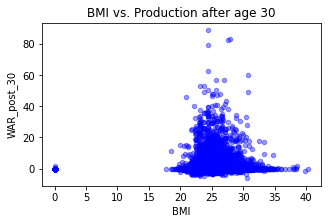

In [135]:
fig, ax = plt.subplots(figsize=(5,3))
career_batters.plot(kind='scatter', x='BMI', y='WAR_post_30', title='BMI vs. Production after age 30', ax=ax, alpha=0.4, color='b')

Consider removing BMI outliers from the dataset. In today's game, there are no players with a BMI anywhere near 10 or 40. Also, we seem to have some players without BMI info, as it is impossible to have a 0 BMI.

In [136]:
career_batters=career_batters.dropna(subset=['BMI'])

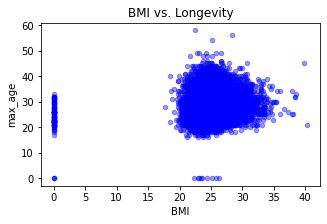

In [137]:
fig, ax = plt.subplots(figsize=(5,3))
career_batters.plot(kind='scatter', x='BMI', y='max_age', title='BMI vs. Longevity', ax=ax, alpha=0.4, color='b')

Once again, we have some outliers to remove. Still, why are the correlations coming up as nan?

In [138]:
for i in range(1, 6):
    q = i / 100
    print('{} percentile: {}'.format(q, career_batters['BMI'].quantile(q=q)))

0.01 percentile: 20.343472678416468
0.02 percentile: 21.184554163879113
0.03 percentile: 21.617915977730863
0.04 percentile: 21.82651035066333
0.05 percentile: 21.97024640839263


In [139]:
for i in range(95, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, career_batters['BMI'].quantile(q=q)))

0.95 percentile: 29.145712496706903
0.96 percentile: 29.421036351254326
0.97 percentile: 29.99767107268579
0.98 percentile: 30.683493645811563
0.99 percentile: 32.078197902439356


In [140]:
for i in range(1, 6):
    q = i / 100
    print('{} percentile: {}'.format(q, career_batters['max_age'].quantile(q=q)))

0.01 percentile: 20.0
0.02 percentile: 20.0
0.03 percentile: 21.0
0.04 percentile: 21.0
0.05 percentile: 22.0


In [141]:
for i in range(95, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, career_batters['max_age'].quantile(q=q)))

0.95 percentile: 37.0
0.96 percentile: 38.0
0.97 percentile: 39.0
0.98 percentile: 39.0
0.99 percentile: 41.0


Do speed guys tend not to age well? Consider doing an analysis with stolen bases later.

In [142]:
career_batters.columns

Index(['mlb_ID', 'max_age', 'min_age', 'WAR', 'WAR_post_30', 'G', 'OPS_plus',
       'seasons', 'PA', 'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field',
       'runs_infield', 'runs_outfield', 'runs_catcher', 'runs_good_plays',
       'runs_defense', 'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg', 'height_m', 'weight_kg', 'BMI'],
      dtype='object')

In [143]:
career_batters=career_batters[['mlb_ID', 'max_age', 'min_age', 'WAR', 'WAR_post_30', 'OPS_plus','height_m', 'weight_kg', 'BMI',
       'seasons', 'PA', 'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field',
       'runs_infield', 'runs_outfield', 'runs_catcher', 'runs_good_plays',
       'runs_defense', 'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg','G']]

In [144]:
career_batters.sort_values(['height_m'], ascending=False).head(10)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,OPS_plus,height_m,weight_kg,BMI,seasons,...,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,G
player_ID,,,,,,,,,,,,,,,,,,,,,
rauchjo01,400010.0,29.0,25.0,-0.06,0.00,-224.7479,2.1082,131.541944,29.596519,4,...,23.46944,9.473,9.468,2.5048,2.5048,2.5002,2.4957,7.081,9.011,231
siscoan01,434878.0,22.0,22.0,-0.01,0.00,-100.0000,2.0828,122.470086,28.231560,1,...,4.69843,1.892,1.895,0.4929,0.4929,0.5000,0.4981,0.330,0.423,2
hillmer01,115955.0,28.0,26.0,-0.37,0.00,-158.2112,2.0828,106.594334,24.571914,3,...,12.86740,5.530,5.540,1.4687,1.4687,1.5009,1.4855,21.933,26.360,49
johnsra05,116615.0,45.0,24.0,-2.45,-2.35,-440.8534,2.0828,102.058405,23.526300,14,...,68.29093,28.204,28.207,7.3675,7.3675,7.5066,7.3738,226.023,276.850,271
youngch03,432934.0,37.0,26.0,0.62,0.23,-28.3721,2.0828,115.666192,26.663140,11,...,48.64079,20.568,20.504,5.5374,5.5374,5.5035,5.4333,71.313,85.291,124
niemaje01,435298.0,28.0,26.0,-0.12,0.00,-109.5969,2.0574,129.273979,30.540324,3,...,13.48759,5.612,5.621,1.4653,1.4653,1.5011,1.4800,4.217,5.306,8
meyeral01,543542.0,27.0,27.0,0.05,0.00,173.9308,2.0574,102.058405,24.110782,1,...,4.62374,1.922,1.889,0.5494,0.5494,0.5000,0.4927,0.641,0.848,1
mickoka01,501874.0,27.0,27.0,-0.01,0.00,-100.0000,2.0574,115.666192,27.325553,1,...,4.15005,1.827,1.828,0.4976,0.4976,0.5000,0.4994,0.330,0.408,6
geejo01,114678.0,30.0,23.0,-0.13,0.00,143.5425,2.0574,102.058405,24.110782,6,...,25.07088,11.005,11.001,2.9811,2.9811,3.0000,2.9729,18.311,18.935,40


Drop the outliers for BMI and max_age.

In [145]:
career_batters = career_batters.loc[career_batters.BMI > 15]
career_batters = career_batters.loc[career_batters.BMI < 35]
career_batters = career_batters.loc[career_batters.max_age > 19]
career_batters = career_batters.loc[career_batters.max_age < 47]

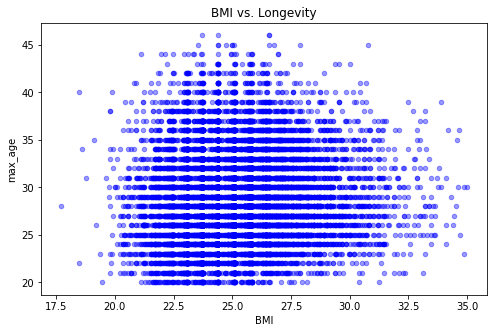

In [146]:
fig, ax = plt.subplots(figsize=(8,5))
career_batters.plot(kind='scatter', x='BMI', y='max_age', title='BMI vs. Longevity', ax=ax, alpha=0.4, color='b')

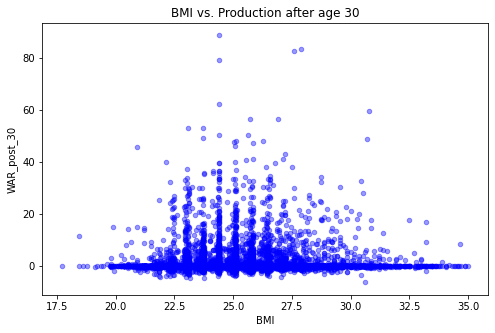

In [147]:
fig, ax = plt.subplots(figsize=(8,5))
career_batters.plot(kind='scatter', x='BMI', y='WAR_post_30', title='BMI vs. Production after age 30', ax=ax, alpha=0.4, color='b')

In [148]:
round(career_batters['BMI'].corr(career_batters['WAR_post_30']),3)

0.023

In [149]:
round(career_batters['BMI'].corr(career_batters['max_age']),3)

0.057

In [150]:
all_batters.age.median()

27.0

For the longevity one, we are not interested in players who did not make it to age 27 in the league. If a player's last year in the league occurred before that age, an age right around the time that many players reach their peak, we should not include them in the longevity dataset. In those cases, it is safe to conclude that lack of abilities contributed to the end of their career, and those players would provide noise for what we are viewing in this particular case.

In [151]:
longevity_df=career_batters[career_batters.max_age > 26.5]

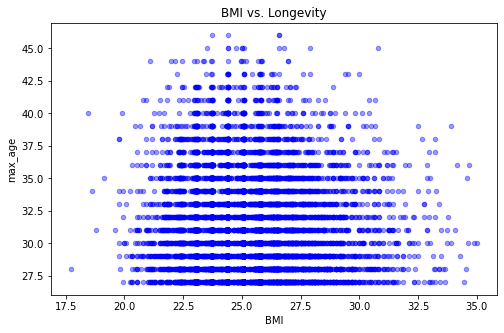

In [152]:
fig, ax = plt.subplots(figsize=(8,5))
longevity_df.plot(kind='scatter', x='BMI', y='max_age', title='BMI vs. Longevity', ax=ax, alpha=0.4, color='b')

In [153]:
round(longevity_df['BMI'].corr(longevity_df['max_age']),3)

-0.027

And, we reach the same conclusion here. There is a very weak negative between BMI and the age of players during their final MLB season. It appears that there are far more important factors to observe when predicting players' production.

Let's try the same with pitchers.

In [154]:
career_pitchers=career_pitchers.dropna(subset=['BMI'])
career_pitchers = career_pitchers.loc[career_pitchers.BMI > 15]
career_pitchers = career_pitchers.loc[career_pitchers.BMI < 35]
career_pitchers = career_pitchers.loc[career_pitchers.max_age > 19]
career_pitchers = career_pitchers.loc[career_pitchers.max_age < 47]

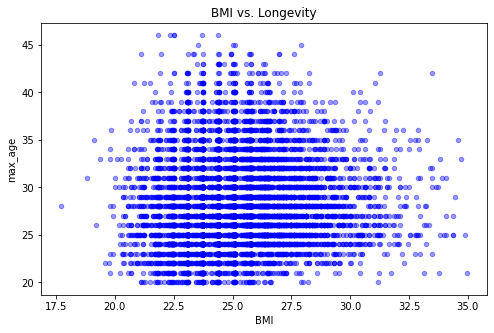

In [155]:
fig, ax = plt.subplots(figsize=(8,5))
career_pitchers.plot(kind='scatter', x='BMI', y='max_age', title='BMI vs. Longevity', ax=ax, alpha=0.4, color='b')

In [156]:
round(career_pitchers['BMI'].corr(career_pitchers['WAR_post_30']),3)

-0.018

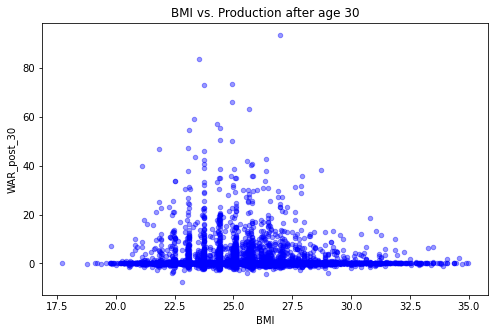

In [157]:
fig, ax = plt.subplots(figsize=(8,5))
career_pitchers.plot(kind='scatter', x='BMI', y='WAR_post_30', title='BMI vs. Production after age 30', ax=ax, alpha=0.4, color='b')

In [158]:
round(career_pitchers['BMI'].corr(career_pitchers['max_age']),3)

0.057

In [159]:
longevity_pitchers=career_pitchers[career_pitchers.max_age > 26.5]

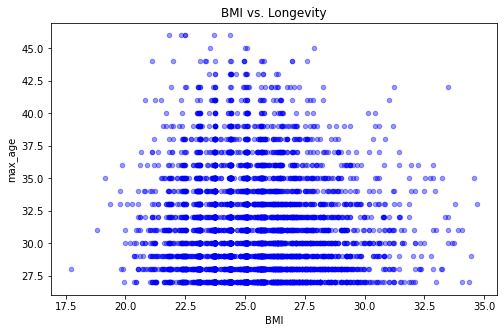

In [160]:
fig, ax = plt.subplots(figsize=(8,5))
longevity_pitchers.plot(kind='scatter', x='BMI', y='max_age', title='BMI vs. Longevity', ax=ax, alpha=0.4, color='b')

In [161]:
round(longevity_pitchers['BMI'].corr(longevity_pitchers['max_age']),3)

-0.028

Unsurprisingly, we reach the same conclusion as we did with the hitters. BMI seems to have very little to do with player longevity/performance past age 30.

## Analysis for batters

### Linear regression

In [162]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

We will want to have all statistics within one dataframe. Traditional counting stats like hits, home runs, and stolen bases, are not currently in career_batters. (Please note that we only have information from 2008-present for these stats.)

In [163]:
combined_batters=career_batters.merge(batting_data, left_on='mlb_ID',right_on='mlb_ID')

Before we run a baseline model, let's remove some columns that we do not need. Either these are clearly confounding variables, or they have no chance of being related to player value.

In [164]:
combined_batters.columns

Index(['mlb_ID', 'max_age', 'min_age', 'WAR', 'WAR_post_30', 'OPS_plus',
       'height_m', 'weight_kg', 'BMI', 'seasons', 'PA_x', 'Inn', 'runs_bat',
       'runs_br', 'runs_dp', 'runs_field', 'runs_infield', 'runs_outfield',
       'runs_catcher', 'runs_good_plays', 'runs_defense', 'runs_position',
       'runs_position_p', 'runs_replacement', 'runs_above_rep',
       'runs_above_avg', 'runs_above_avg_off', 'runs_above_avg_def', 'WAA',
       'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary',
       'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg', 'TB_lg', 'G_x',
       'Name', 'Age', '#days', 'Lev', 'Tm', 'G_y', 'PA_y', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP',
       'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS'],
      dtype='object')

In [165]:
combined_batters=combined_batters.drop(columns=['G_y', 'PA_y','Inn','salary','TOB_lg', 'TB_lg'])

In [166]:
combined_batters=combined_batters.drop(columns=['#days','Age','teamRpG', 'oppRpG',
       'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent', 'pyth_exponent_rep','Lev','Tm'])

In [167]:
combined_batters=combined_batters.drop(columns=['runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def'])

In [168]:
combined_batters=combined_batters.drop(columns=['Name'])

In [169]:
combined_batters=combined_batters.drop(columns=['G_x', 'PA_x'])

In [170]:
combined_batters.shape

(3182, 48)

In [171]:
combined_batters=combined_batters.dropna(subset=['BA','OBP','SLG','OPS'])

In [172]:
#OPS is the sum of OBP and SLG, which would be problematic.
combined_batters=combined_batters.drop(columns=['OPS'])

In [173]:
combined_batters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3173 entries, 0 to 3181
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mlb_ID            3173 non-null   float64
 1   max_age           3173 non-null   float64
 2   min_age           3173 non-null   float64
 3   WAR               3173 non-null   float64
 4   WAR_post_30       3173 non-null   float64
 5   OPS_plus          3173 non-null   float64
 6   height_m          3173 non-null   float64
 7   weight_kg         3173 non-null   float64
 8   BMI               3173 non-null   float64
 9   seasons           3173 non-null   int64  
 10  runs_bat          3173 non-null   float64
 11  runs_br           3173 non-null   float64
 12  runs_dp           3173 non-null   float64
 13  runs_field        3173 non-null   float64
 14  runs_infield      3173 non-null   float64
 15  runs_outfield     3173 non-null   float64
 16  runs_catcher      3173 non-null   float64


In [174]:
combined_batters.rename(columns = {'3B':'triples'}, inplace = True)
combined_batters.rename(columns = {'2B':'doubles'}, inplace = True)

In [175]:
combined_batters.columns

Index(['mlb_ID', 'max_age', 'min_age', 'WAR', 'WAR_post_30', 'OPS_plus',
       'height_m', 'weight_kg', 'BMI', 'seasons', 'runs_bat', 'runs_br',
       'runs_dp', 'runs_field', 'runs_infield', 'runs_outfield',
       'runs_catcher', 'runs_good_plays', 'runs_defense', 'runs_position',
       'runs_position_p', 'WAR_def', 'WAR_off', 'WAR_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'AB', 'R',
       'H', 'doubles', 'triples', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH',
       'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG'],
      dtype='object')

In [176]:
#outcome='WAR'
#cols=[col for col in career_batters.columns]
#cols.remove('WAR','mlb_ID')
#predictors='+'.join(cols)
#formula=outcome+'~'+predictors
#model=ols(formula=formula,data=career_batters).fit()
#model.summary()

#TypeError: remove() takes exactly one argument (2 given)
#At this point, since I have merged it, I may just be able to drop mlb_ID from this dataframe.
#I have gotten what I need out of that field.

In [177]:
#combined_batters=combined_batters.drop(columns=['mlb_ID'])

In [178]:
combined_batters=combined_batters[['WAR', 'WAR_post_30', 'OPS_plus', 'seasons','height_m', 'weight_kg','BMI','AB',
       'runs_bat', 'runs_br', 'runs_dp', 'runs_field', 'runs_infield',
       'runs_outfield', 'runs_catcher', 'runs_good_plays', 'runs_defense',
       'runs_position', 'runs_position_p', 'WAR_def', 'WAR_off', 'WAR_rep',
       'waa_win_perc', 'waa_win_perc_off', 'waa_win_perc_def',
       'waa_win_perc_rep', 'R', 'H',
       'doubles', 'triples', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF',
       'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG','max_age','min_age']]

In [179]:
combined_batters['OPS_plus']=combined_batters['OPS_plus']/combined_batters['seasons']

In [180]:
combined_batters.sort_values(['height_m'], ascending=False)

,WAR,WAR_post_30,OPS_plus,seasons,height_m,weight_kg,BMI,AB,runs_bat,runs_br,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,max_age,min_age
2342,-0.06,0.00,-56.186975,4,2.1082,131.541944,29.596519,1,-3.84,-0.01,...,2,0,0,0,0,0.000,0.000,0.000,29.0,25.0
3160,0.62,0.23,-2.579282,11,2.0828,115.666192,26.663140,102,-29.79,-0.78,...,13,1,3,0,0,0.176,0.213,0.235,37.0,26.0
1462,-2.45,-2.35,-31.489529,14,2.0828,102.058405,23.526300,76,-118.36,-2.67,...,7,0,0,0,0,0.118,0.173,0.132,45.0,24.0
2037,-0.12,0.00,-36.532300,3,2.0574,129.273979,30.540324,13,-3.11,0.00,...,1,0,0,0,0,0.077,0.077,0.077,28.0,26.0
1897,-0.01,0.00,-100.000000,1,2.0574,115.666192,27.325553,1,-0.26,0.00,...,0,0,0,0,0,0.000,0.000,0.000,27.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20.85,4.93,93.035390,10,1.6764,77.110795,27.438469,1269,-50.70,26.24,...,34,9,21,13,2,0.264,0.327,0.335,35.0,26.0
57,36.46,0.00,117.788390,10,1.6764,75.296423,26.792858,5177,167.79,11.82,...,25,39,149,256,71,0.311,0.361,0.458,30.0,21.0
1515,-0.06,0.00,88.629560,5,1.6764,72.574866,25.824441,750,-18.05,-0.18,...,6,8,16,19,9,0.235,0.320,0.359,28.0,24.0
65,-0.60,0.00,70.327283,6,1.6764,72.574866,25.824441,1750,-76.63,5.64,...,23,15,32,39,10,0.231,0.275,0.323,28.0,22.0


In [181]:
combined_batters=combined_batters.drop(columns=['waa_win_perc_off','waa_win_perc','waa_win_perc_rep','waa_win_perc_def','waa_win_perc_off'])

In [182]:
outcome='WAR_post_30'
cols=[col for col in combined_batters.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_batters).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     194.3
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:10:41   Log-Likelihood:                -6595.5
No. Observations:                3173   AIC:                         1.327e+04
Df Residuals:                    3132   BIC:                         1.352e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -18.1713     13.196     -1.377      0.169     -44.045       7.703
WAR                 4.0025      0.549      7.289      0.000       2.926       5.079
OPS_plus           -0.0027      0.001     -2.702      0.007      -0.005      -0.001
seasons             0.0236      0.039      0.601      0.548      -0.053       0.101
height_m            7.5953      7.045      1.078      0.281      -6.217      21.408
weight_kg          -0.0884      0.069     -1.284      0.199      -0.223       0.047
BMI                 0.3236      0.241      1.341      0.180      -0.150       0.797
AB                  0.0047      0.001      5.888      0.000       0.003       0.006
runs_bat           -0.1685      0.025     -6.768      0.000      -0.217      -0.120
runs_br            -0.2498      0.027     -9.150      0.000      -0.303      -0.196
runs_dp            -0.1233      0.030     -4.106      0.000      -0.182      -0.064
runs_field         -0.0076      0.007     -1.059      0.290      -0.022       0.006
runs_infield       -0.0081      0.015     -0.537      0.591      -0.037       0.021
runs_outfield      -0.0491      0.009     -5.463      0.000      -0.067      -0.031
runs_catcher       -0.0229      0.008     -2.705      0.007      -0.039      -0.006
runs_good_plays     0.0104      0.011      0.913      0.361      -0.012       0.033
runs_defense       -0.0772      0.028     -2.726      0.006      -0.133      -0.022
runs_position       0.1167      0.025      4.581      0.000       0.067       0.167
runs_position_p    -0.1799      0.026     -6.945      0.000      -0.231      -0.129
WAR_def            -2.9379      0.402     -7.317      0.000      -3.725      -2.151
WAR_off            -1.9351      0.470     -4.117      0.000      -2.857      -1.013
WAR_rep            -1.5930      0.249     -6.389      0.000      -2.082      -1.104
R                   0.0096      0.004      2.553      0.011       0.002       0.017
H                  -0.0158      0.003     -5.344      0.000      -0.022      -0.010
doubles            -0.0046      0.005     -0.928      0.353      -0.014       0.005
triples            -0.0697      0.013     -5.542      0.000      -0.094      -0.045
HR                 -0.0278      0.007     -3.869      0.000      -0.042      -0.014
RBI                -0.0003      0.004     -0.085      0.932      -0.007       0.007
BB                 -0.0046      0.002     -2.782      0.005      -0.008      -0.001
IBB                -0.0143      0.007     -2.005      0.045      -0.028      -0.000
SO                 -0.0033      0.001     -4.407      0.000      -0.005      -0.002
HBP                -0.0008      0.004     -0.189      0.850      -0.010       0.008
SH                  0.0082      0.006      1.329      0.184      -0.004       0.020
SF                 -0.0142      0.015     -0.960      0.337

We have a high R-squared but a lot of confounding and insignificant variables.

Also, we should calculate RMSE for each model.

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import statsmodels.formula.api as smf

In [184]:
y=combined_batters.WAR_post_30
X=combined_batters.drop('WAR_post_30', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

2538 635
Train Mean Squared Error 3.713958148285627
Test Mean Squared Error 4.147980358589258
Root Train Mean Squared Error 1.9271632386192996
Root Test Mean Squared Error 2.0366591169337243


In [185]:
#The p-value for RBI is .971, meaning it is easily to conclude it is statistically insignificant. 
#RBI is a traditional statistic that has historically gotten much attention,
#but given how much is out of the player's control, it is easy to see why it would be statistically insignificant.
#(It is far easier to drive in runs when your teammates are good at getting on base.)
combined_batters_2=combined_batters.drop(columns=['OPS_plus','seasons','height_m','weight_kg',
                                                  'RBI','GDP','max_age','min_age'])

In [186]:
combined_batters.shape

(3173, 42)

In [187]:
combined_batters_2=combined_batters_2.drop(columns=['WAR','WAR_def','WAR_off','WAR_rep','HBP','IBB','SF','SH'])

In [188]:
combined_batters_2=combined_batters_2.drop(columns=['R'])

In [189]:
combined_batters_2.shape

(3173, 25)

In [190]:
outcome='WAR_post_30'
cols=[col for col in combined_batters_2.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_batters_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     185.8
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:10:43   Log-Likelihood:                -7213.8
No. Observations:                3173   AIC:                         1.448e+04
Df Residuals:                    3149   BIC:                         1.462e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0979      0.528      2.079      0.038       0.063       2.133
BMI                -0.0384      0.019     -1.993      0.046      -0.076      -0.001
AB                  0.0109      0.001     16.173      0.000       0.010       0.012
runs_bat            0.0517      0.001     41.934      0.000       0.049       0.054
runs_br            -0.0244      0.011     -2.301      0.021      -0.045      -0.004
runs_dp             0.1128      0.015      7.722      0.000       0.084       0.141
runs_field         -0.0008      0.005     -0.163      0.871      -0.011       0.009
runs_infield        0.0363      0.017      2.112      0.035       0.003       0.070
runs_outfield      -0.0321      0.008     -3.773      0.000      -0.049      -0.015
runs_catcher        0.0084      0.008      1.058      0.290      -0.007       0.024
runs_good_plays     0.0116      0.011      1.069      0.285      -0.010       0.033
runs_defense        0.0234      0.004      5.902      0.000       0.016       0.031
runs_position       0.0304      0.002     12.312      0.000       0.026       0.035
runs_position_p     0.0320      0.003     10.825      0.000       0.026       0.038
H                  -0.0245      0.002    -10.218      0.000      -0.029      -0.020
doubles            -0.0073      0.005     -1.359      0.174      -0.018       0.003
triples            -0.0994      0.013     -7.549      0.000      -0.125      -0.074
HR                 -0.0296      0.004     -8.434      0.000      -0.036      -0.023
BB                 -0.0017      0.001     -1.353      0.176      -0.004       0.001
SO                 -0.0079      0.001     -9.276      0.000      -0.010      -0.006
SB                  0.0184      0.005      3.642      0.000       0.008       0.028
CS                 -0.0823      0.017     -4.776      0.000      -0.116      -0.049
BA                  0.0261      1.081      0.024      0.981      -2.093       2.145
OBP                 0.7777      0.795      0.978      0.328      -0.782       2.337
SLG                -0.0659      0.495     -0.133      0.894      -1.035       0.904
==============================================================================
Omnibus:                     2546.049   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166060.014
Skew:                           3.315   Prob(JB):                         0.00
Kurtosis:                      37.815   Cond. No.                     5.30e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [191]:
y=combined_batters_2.WAR_post_30
X=combined_batters_2.drop('WAR_post_30', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

2538 635
Train Mean Squared Error 5.66969571741098
Test Mean Squared Error 5.262510442633776
Root Train Mean Squared Error 2.381112285762891
Root Test Mean Squared Error 2.2940162254512884


In [192]:
df_pairs = combined_batters_2.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_pairs['Pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['Pairs'], inplace = True)
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['Correlation']
df_pairs.drop_duplicates(inplace=True)
df_pairs[(df_pairs.Correlation>.8) & (df_pairs.Correlation<1)]

,Correlation
Pairs,
"(AB, H)",0.996099
"(H, doubles)",0.990209
"(AB, doubles)",0.987599
"(AB, SO)",0.948221
"(SB, CS)",0.945399
"(BB, doubles)",0.938219
"(AB, BB)",0.938067
"(H, BB)",0.931801
"(SO, doubles)",0.929779


In [193]:
#H (hits) is an easy decision as far as removals go, as it is a sum of HRs, triples, doubles, and singles.
combined_batters_3=combined_batters_2.drop(columns=['H','runs_defense'])

In [194]:
combined_batters_3.shape

(3173, 23)

It may be helpful to remove players with so few ABs (at bats). The main reasons the batters table is so much larger is because it includes many pitchers with around 50 at bats. Those players are irrelevant, especially with the universal designated hitter becoming close to reality. Also, players with so few at bats cannot reach any significant amount of WAR, regardless of how well they play during that tiny sample size.

In [195]:
combined_batters_3=combined_batters_3.loc[combined_batters_3.AB >= 1000]

Clearly, there is a ton of multicollinearity here. We should remove quite a few variables due to their strong correlation with other independent variables.

In [196]:
outcome='WAR_post_30'
cols=[col for col in combined_batters_3.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_batters_3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     28.75
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           4.09e-79
Time:                        18:10:44   Log-Likelihood:                -1848.2
No. Observations:                 623   AIC:                             3742.
Df Residuals:                     600   BIC:                             3844.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          14.3000      5.204      2.748      0.006       4.079      24.521
BMI                 0.0068      0.105      0.065      0.949      -0.199       0.212
AB                  0.0038      0.001      4.301      0.000       0.002       0.005
runs_bat            0.0505      0.003     15.151      0.000       0.044       0.057
runs_br            -0.0144      0.024     -0.589      0.556      -0.063       0.034
runs_dp             0.1260      0.033      3.821      0.000       0.061       0.191
runs_field          0.0280      0.005      5.113      0.000       0.017       0.039
runs_infield        0.0226      0.047      0.479      0.632      -0.070       0.115
runs_outfield       0.0090      0.020      0.445      0.657      -0.031       0.049
runs_catcher        0.0233      0.019      1.224      0.222      -0.014       0.061
runs_good_plays     0.0244      0.025      0.960      0.337      -0.025       0.074
runs_position       0.0267      0.006      4.817      0.000       0.016       0.038
runs_position_p     0.0918      0.368      0.249      0.803      -0.631       0.815
doubles            -0.0133      0.012     -1.134      0.257      -0.036       0.010
triples            -0.0988      0.030     -3.345      0.001      -0.157      -0.041
HR                 -0.0165      0.011     -1.442      0.150      -0.039       0.006
BB                 -0.0010      0.004     -0.227      0.820      -0.010       0.008
SO                 -0.0060      0.002     -3.364      0.001      -0.010      -0.003
SB                  0.0156      0.011      1.421      0.156      -0.006       0.037
CS                 -0.0854      0.038     -2.261      0.024      -0.160      -0.011
BA                -24.6736     21.108     -1.169      0.243     -66.129      16.782
OBP                -3.2164     20.335     -0.158      0.874     -43.153      36.720
SLG               -14.9599      9.532     -1.569      0.117     -33.680       3.760
==============================================================================
Omnibus:                      213.021   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1075.642
Skew:                           1.449   Prob(JB):                    2.68e-234
Kurtosis:                       8.748   Cond. No.                     4.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
y=combined_batters_3.WAR_post_30
X=combined_batters_3.drop('WAR_post_30', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

498 125
Train Mean Squared Error 20.921467995705367
Test Mean Squared Error 30.33291339537923
Root Train Mean Squared Error 4.5739991250223655
Root Test Mean Squared Error 5.507532423452378


In [198]:
df_pairs = combined_batters_3.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_pairs['Pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['Pairs'], inplace = True)
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['Correlation']
df_pairs.drop_duplicates(inplace=True)
df_pairs[(df_pairs.Correlation>.8) & (df_pairs.Correlation<1)]

,Correlation
Pairs,
"(doubles, AB)",0.965811
"(CS, SB)",0.925947
"(HR, SO)",0.848161
"(BB, AB)",0.836303
"(BB, doubles)",0.835997
"(AB, SO)",0.831004
"(SO, BB)",0.820850
"(HR, BB)",0.812916


In [199]:
combined_batters_4=combined_batters_3.drop(columns=['BA','runs_good_plays','runs_position','runs_position_p'])

In [200]:
combined_batters_4.insert(10, 'strikeout_rate', .2, True)

In [201]:
combined_batters_4['strikeout_rate'] = np.where(combined_batters_4['SO']>0, combined_batters_4['SO']/combined_batters_4['AB'], 0)

In [202]:
combined_batters_4=combined_batters_4.drop(columns=['HR','triples'])

In [203]:
outcome='WAR_post_30'
cols=[col for col in combined_batters_4.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_batters_4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     33.10
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           5.54e-75
Time:                        18:10:44   Log-Likelihood:                -1867.6
No. Observations:                 623   AIC:                             3771.
Df Residuals:                     605   BIC:                             3851.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.3864      5.269      2.541      0.011       3.038      23.734
BMI                0.0685      0.105      0.651      0.515      -0.138       0.275
AB                 0.0030      0.001      3.310      0.001       0.001       0.005
runs_bat           0.0443      0.003     14.304      0.000       0.038       0.050
runs_br            0.0124      0.024      0.505      0.614      -0.036       0.060
runs_dp            0.0640      0.032      2.016      0.044       0.002       0.126
runs_field         0.0286      0.005      5.239      0.000       0.018       0.039
runs_infield       0.0381      0.048      0.794      0.428      -0.056       0.132
runs_outfield      0.0139      0.020      0.685      0.493      -0.026       0.054
runs_catcher       0.0309      0.019      1.595      0.111      -0.007       0.069
strikeout_rate    -0.2218      6.935     -0.032      0.974     -13.841      13.398
doubles           -0.0127      0.012     -1.099      0.272      -0.035       0.010
BB                 0.0003      0.004      0.074      0.941      -0.007       0.007
SO                -0.0071      0.003     -2.716      0.007      -0.012      -0.002
SB                 0.0089      0.011      0.801      0.423      -0.013       0.031
CS                -0.1008      0.038     -2.686      0.007      -0.175      -0.027
OBP               -5.1313     14.525     -0.353      0.724     -33.657      23.394
SLG              -30.3215      6.775     -4.475      0.000     -43.627     -17.016
==============================================================================
Omnibus:                      227.214   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1208.314
Skew:                           1.541   Prob(JB):                    4.15e-263
Kurtosis:                       9.087   Cond. No.                     2.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
y=combined_batters_4.WAR_post_30
X=combined_batters_4.drop('WAR_post_30', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

498 125
Train Mean Squared Error 22.990373811322062
Test Mean Squared Error 27.798964422661662
Root Train Mean Squared Error 4.794827818735732
Root Test Mean Squared Error 5.272472325452421


In [205]:
#These are all statistically insignificant.
combined_batters_5=combined_batters_4.drop(columns=['BB','runs_br','runs_outfield'])

In [206]:
for i in range(97, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, combined_batters_5['WAR_post_30'].quantile(q=q)))

0.97 percentile: 22.313200000000016
0.98 percentile: 25.67399999999995
0.99 percentile: 30.383599999999987


In [207]:
#Remove large outliers. The dataset is very right-skewed at the moment, as shown by the skew coefficient.
combined_batters_5=combined_batters_5.loc[combined_batters_5.WAR_post_30<20]

In [208]:
outcome='WAR_post_30'
cols=[col for col in combined_batters_5.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_batters_5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     21.26
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           8.61e-44
Time:                        18:10:44   Log-Likelihood:                -1615.8
No. Observations:                 598   AIC:                             3262.
Df Residuals:                     583   BIC:                             3327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3345      3.810      1.138      0.256      -3.148      11.817
BMI                0.0872      0.078      1.112      0.267      -0.067       0.241
AB                 0.0008      0.001      1.076      0.282      -0.001       0.002
runs_bat           0.0218      0.003      7.621      0.000       0.016       0.027
runs_dp           -0.0257      0.025     -1.042      0.298      -0.074       0.023
runs_field         0.0188      0.004      4.295      0.000       0.010       0.027
runs_infield       0.0672      0.038      1.773      0.077      -0.007       0.142
runs_catcher       0.0455      0.015      3.100      0.002       0.017       0.074
strikeout_rate    -5.8230      5.304     -1.098      0.273     -16.240       4.594
doubles            0.0040      0.009      0.429      0.668      -0.014       0.022
SO                -0.0020      0.002     -1.049      0.295      -0.006       0.002
SB                 0.0171      0.007      2.385      0.017       0.003       0.031
CS                -0.0873      0.027     -3.224      0.001      -0.140      -0.034
OBP               14.1336      8.998      1.571      0.117      -3.539      31.806
SLG              -22.0052      4.711     -4.671      0.000     -31.258     -12.752
==============================================================================
Omnibus:                      207.713   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              768.896
Skew:                           1.594   Prob(JB):                    1.09e-167
Kurtosis:                       7.550   Cond. No.                     1.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
y=combined_batters_5.WAR_post_30
X=combined_batters_5.drop('WAR_post_30', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

478 120
Train Mean Squared Error 13.249504570549876
Test Mean Squared Error 12.814658576553423
Root Train Mean Squared Error 3.6399868915354454
Root Test Mean Squared Error 3.579756776172569


In [210]:
combined_batters_5=combined_batters_5.drop(columns=['SO','AB','SLG','runs_dp'])

In [211]:
outcome='WAR_post_30'
cols=[col for col in combined_batters_5.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_batters_5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     26.02
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           4.96e-41
Time:                        18:10:44   Log-Likelihood:                -1629.4
No. Observations:                 598   AIC:                             3281.
Df Residuals:                     587   BIC:                             3329.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2220      3.680      0.332      0.740      -6.005       8.449
BMI                0.1023      0.078      1.315      0.189      -0.051       0.255
runs_bat           0.0175      0.003      6.690      0.000       0.012       0.023
runs_field         0.0189      0.004      4.287      0.000       0.010       0.028
runs_infield       0.0727      0.039      1.888      0.060      -0.003       0.148
runs_catcher       0.0515      0.015      3.467      0.001       0.022       0.081
strikeout_rate   -15.9206      2.557     -6.226      0.000     -20.943     -10.899
doubles            0.0064      0.003      2.383      0.018       0.001       0.012
SB                 0.0161      0.007      2.262      0.024       0.002       0.030
CS                -0.0746      0.027     -2.758      0.006      -0.128      -0.021
OBP                2.6653      8.823      0.302      0.763     -14.664      19.994
==============================================================================
Omnibus:                      193.355   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.924
Skew:                           1.500   Prob(JB):                    5.56e-146
Kurtosis:                       7.224   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
y=combined_batters_5.WAR_post_30
X=combined_batters_5.drop('WAR_post_30', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

478 120
Train Mean Squared Error 14.012288425172837
Test Mean Squared Error 12.63888253047827
Root Train Mean Squared Error 3.7432991364801236
Root Test Mean Squared Error 3.555120607022815


Some takeaways from the linear regression attempts: (1) We started with many variables, but after dropping confounding and insignificant variables, R-squared dropped dramatically. We got .34 as our R-squared in the final model, so variance in our variables still explain 34% of the difference in WAR after age 30, which is a sizable chunk, but we can likely do better with another model.

(2a) Outfielders, and players who rely on speed, are less durable than the average player.

(2b) Stolen bases (SB) are not worth the risk unless the player is very likely to be safe. The value of a SB is about .16 WAR, but the value of a caught stealing (CS) is -.76 WAR. So, for a stolen base to be worth the risk, a player must be safe about 80% of the time (.76/.76+.18). Not many players can achieve this, especially during the latter portion of their career.

(3a) BA (batting average), OBP (on-base percentage), and SLG (slugging percentage) are highly correlated, so it would not be helpful to include all three in a linear regression model. However, OBP gives us the most useful information about a batter's value. By contrast, BA was least helpful of the three. This is most likely a result of its failure to credit hitters for walks and doubles.

(3b) Strikeout rate has a clear negative effect on overall player value. While power is relatively unsustainable for players past the midpoint of their careers, the ability to make contact is sustainable and quite valuable.

In [213]:
#Try random forest, also consider % career WAR before 30 and % career WAR after 30 columns.
#If a player has at least 10 career WAR, and at least 30% of that was after the age of 30,
#have a column with a 1 for that player. Otherwise, put a 0 in the column for that player.

In [214]:
combined_batters.head()

,WAR,WAR_post_30,OPS_plus,seasons,height_m,weight_kg,BMI,AB,runs_bat,runs_br,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,max_age,min_age
0,-0.07,-0.01,-100.000000,3,1.9050,97.522476,26.872914,2,-1.45,0.00,...,0,0,0,0,0,0.000,0.000,0.000,33.0,24.0
1,-0.08,0.00,-73.908367,3,1.8796,106.594334,30.171941,9,-1.77,-0.01,...,0,0,1,0,0,0.111,0.111,0.111,30.0,24.0
2,-0.20,0.00,74.512167,3,1.9050,97.522476,26.872914,55,-17.06,-0.26,...,1,1,0,5,2,0.309,0.339,0.509,27.0,25.0
3,60.18,18.18,131.006517,18,1.8288,99.790440,29.837093,2601,369.37,15.97,...,1,21,60,104,32,0.271,0.364,0.418,40.0,22.0
4,23.95,6.64,139.191171,7,1.9050,113.398227,31.247574,3787,181.70,-7.85,...,0,35,120,10,2,0.294,0.350,0.520,33.0,27.0


In [215]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

In [216]:
rf=combined_batters.loc[combined_batters.AB >= 1000]
rf.insert(3, 'pct_WAR_post_30', 0.3, True)
rf['pct_WAR_post_30']=rf['WAR_post_30']/rf['WAR']

In [217]:
rf.insert(0, 'success', 0, True)
rf.loc[(rf['WAR']>=10)&(rf['pct_WAR_post_30']>=.25), 'success']=1
rf.head()

,success,WAR,WAR_post_30,OPS_plus,pct_WAR_post_30,seasons,height_m,weight_kg,BMI,AB,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,max_age,min_age
3,1,60.18,18.18,131.006517,0.302094,18,1.8288,99.790440,29.837093,2601,...,1,21,60,104,32,0.271,0.364,0.418,40.0,22.0
4,1,23.95,6.64,139.191171,0.277244,7,1.9050,113.398227,31.247574,3787,...,0,35,120,10,2,0.294,0.350,0.520,33.0,27.0
7,0,7.66,0.00,105.593333,0.000000,6,1.8542,92.986546,27.046244,2126,...,11,12,25,31,11,0.241,0.304,0.367,28.0,23.0
9,0,12.13,0.00,139.902367,0.000000,3,1.8288,92.986546,27.802746,1219,...,0,4,15,61,13,0.281,0.371,0.538,22.0,20.0
11,0,7.43,0.00,109.940633,0.000000,3,1.8288,95.254511,28.480862,1004,...,4,3,19,12,8,0.262,0.329,0.426,24.0,22.0


In [218]:
rf.rename(columns = {'3B':'triples'}, inplace = True)
rf.rename(columns = {'2B':'doubles'}, inplace = True)
rf=rf.drop(columns=['runs_good_plays','runs_position_p','seasons','WAR',
                    'WAR_post_30','WAR_rep','WAR_off','WAR_def','pct_WAR_post_30','max_age'])
#Max_age should be dropped because if a player is still active, this would still be unknown.
#We need to make predictions.

In [219]:
rf['success']=rf['success'].astype(int)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=50)
#Reassign X_train and y_train to be from the new dataframe.
y=rf.success
X=rf.drop('success', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

498 125


In [220]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=50)

In [221]:
bagged_predictions_train = bagged_tree.predict(X_train)
bagged_predictions_test = bagged_tree.predict(X_test)

In [222]:
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, mean_squared_error, mean_absolute_error, classification_report,precision_score, recall_score, accuracy_score, f1_score

def performance_results(trainx, trainy, train_prediction, testx, testy, test_prediction, model):  
    
    print("\n")
    
    print("Train Score Results")
    print(classification_report(trainy, train_prediction))       
    print(f'Train Set Accuracy: {accuracy_score(trainy, train_prediction):.4f}')
    print(f'Train Set Recall: {recall_score(trainy, train_prediction):.4f}')
    print(f'Train Set Precision: {precision_score(trainy, train_prediction):.4f}')
    print(f'Train Set F1: {f1_score(trainy, train_prediction):.4f}')

    print("\n")
    
    print("Test Score Results")    
    print(classification_report(testy, test_prediction))       
    print(f'Test Set Accuracy: {accuracy_score(testy, test_prediction):.4f}')
    print(f'Test Set Recall: {recall_score(testy, test_prediction):.4f}')
    print(f'Test Set Precision: {precision_score(testy, test_prediction):.4f}')
    print(f'Test Set F1: {f1_score(testy, test_prediction):.4f}')
    
    print("\n")
    print("Test Set Confusion Matrix")
    plot_confusion_matrix(model, testx, testy, cmap=plt.cm.Blues)



Train Score Results
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       409
           1       1.00      0.70      0.82        89

    accuracy                           0.95       498
   macro avg       0.97      0.85      0.89       498
weighted avg       0.95      0.95      0.94       498

Train Set Accuracy: 0.9458
Train Set Recall: 0.6966
Train Set Precision: 1.0000
Train Set F1: 0.8212


Test Score Results
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       101
           1       0.40      0.25      0.31        24

    accuracy                           0.78       125
   macro avg       0.62      0.58      0.59       125
weighted avg       0.75      0.78      0.76       125

Test Set Accuracy: 0.7840
Test Set Recall: 0.2500
Test Set Precision: 0.4000
Test Set F1: 0.3077


Test Set Confusion Matrix


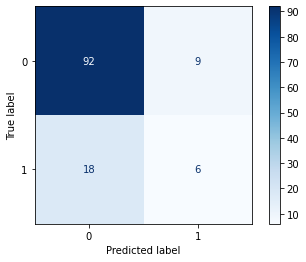

In [223]:
performance_results(X_train, y_train, bagged_predictions_train, X_test, y_test, bagged_predictions_test, bagged_tree)

In [224]:
#Instansiate the model, select hyperparameters to run through, fit the model.
randomforest = RandomForestClassifier(max_depth=10, criterion='gini', n_estimators=10, max_features=10)
randomforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=10)

In [225]:
#Make predictions on the model.
random_forest_train = randomforest.predict(X_train)
random_forest_test = randomforest.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       409
           1       0.99      0.94      0.97        89

    accuracy                           0.99       498
   macro avg       0.99      0.97      0.98       498
weighted avg       0.99      0.99      0.99       498

Train Set Accuracy: 0.9880
Train Set Recall: 0.9438
Train Set Precision: 0.9882
Train Set F1: 0.9655


Test Score Results
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       101
           1       0.41      0.38      0.39        24

    accuracy                           0.78       125
   macro avg       0.63      0.62      0.63       125
weighted avg       0.77      0.78      0.77       125

Test Set Accuracy: 0.7760
Test Set Recall: 0.3750
Test Set Precision: 0.4091
Test Set F1: 0.3913


Test Set Confusion Matrix


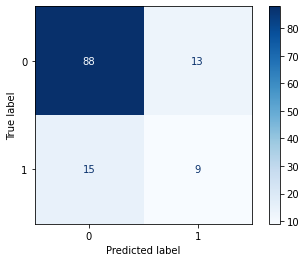

In [226]:
performance_results(X_train, y_train, random_forest_train, X_test, y_test, random_forest_test, randomforest)

In [227]:
#Create graph that displays the impact each figure makes on the dependent variable.
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(6,6))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [228]:
from sklearn.model_selection import cross_val_score, GridSearchCV

#Using GridSearch to improve the Random Tree model.
rfc = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rfc, X_train, y_train, cv=3))
round(mean_rf_cv_score, 3)

0.851

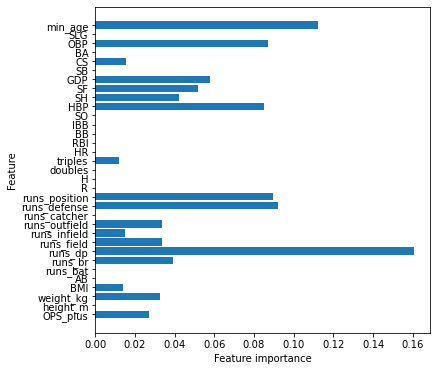

In [229]:
#View the features of the first tree.
rf_feature_importance_tree_1 = randomforest.estimators_[0]
plot_feature_importances(rf_feature_importance_tree_1)

In [230]:
#Using GridSearch to improve the Random Tree model.
rfc = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rfc, X_train, y_train, cv=3))
round(mean_rf_cv_score, 3)

0.835

In [231]:
from imblearn.over_sampling import SMOTE, ADASYN

In [232]:
print('Before:')
print(y_train.value_counts()) 
print('\n')

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

print('After:')
print(pd.Series(y_train_resampled).value_counts()) 

Before:
0    409
1     89
Name: success, dtype: int64


After:
1    409
0    409
Name: success, dtype: int64


In [233]:
#Instansiate the model, select hyperparameters to run through, fit the model.
randomforest = RandomForestClassifier(max_depth=5, criterion='gini', n_estimators=25, max_features=25)
randomforest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, max_features=25, n_estimators=25)

In [234]:
#Make predictions on the model.
random_forest_train = randomforest.predict(X_train_resampled)
random_forest_test = randomforest.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       409
           1       0.94      0.94      0.94       409

    accuracy                           0.94       818
   macro avg       0.94      0.94      0.94       818
weighted avg       0.94      0.94      0.94       818

Train Set Accuracy: 0.9389
Train Set Recall: 0.9389
Train Set Precision: 0.9389
Train Set F1: 0.9389


Test Score Results
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       101
           1       0.43      0.62      0.51        24

    accuracy                           0.77       125
   macro avg       0.66      0.71      0.68       125
weighted avg       0.81      0.77      0.78       125

Test Set Accuracy: 0.7680
Test Set Recall: 0.6250
Test Set Precision: 0.4286
Test Set F1: 0.5085


Test Set Confusion Matrix


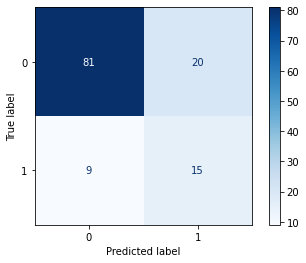

In [235]:
performance_results(X_train_resampled, y_train_resampled, random_forest_train, X_test, y_test,
                    random_forest_test, randomforest)

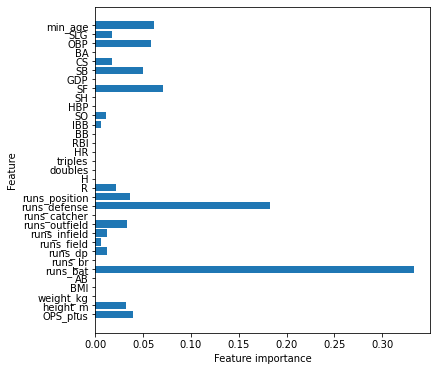

In [236]:
#View the features of the first tree.
rf_feature_importance_tree_1 = randomforest.estimators_[0]
plot_feature_importances(rf_feature_importance_tree_1)
#Can also do this for the entire forest as opposed to individual trees.

Remember post-modeling EDA with important features, evaluation metrics for classification model. Try turning model into a function.

BEGINNING OF PITCHER ANALYSIS WITH LINEAR REGRESSION

In [237]:
player_ids.head(2)

,PLAYERNAME,MLBID,BREFID,IDFANGRAPHS,BIRTHDATE,FIRSTNAME,LASTNAME,TEAM,LG,IDPLAYER,...,DRAFTKINGSNAME,OTTONEUID,HQID,RAZZBALLNAME,FANTRAXID,FANTRAXNAME,ROTOWIRENAME,ALLPOS,NFBCLASTFIRST,ACTIVE
0,David Aardsma,430911.0,aardsda01,1902,12/27/1981,David,Aardsma,NaN,NaN,aardsda01,...,David Aardsma,4362.0,NaN,David Aardsma,NaN,NaN,David Aardsma,P,"Aardsma, David",N
1,Fernando Abad,472551.0,abadfe01,4994,12/17/1985,Fernando,Abad,BAL,AL,abadfe01,...,Fernando Abad,7372.0,3556.0,Fernando Abad,*01viz*,Fernando Abad,Fernando Abad,P,"Abad, Fernando",Y


In [238]:
ids_condensed = player_ids[['PLAYERNAME','MLBID','BREFID']]
ids_condensed.head(2)

,PLAYERNAME,MLBID,BREFID
0,David Aardsma,430911.0,aardsda01
1,Fernando Abad,472551.0,abadfe01


In [239]:
pitching_data.head(2)

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,Str,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W
1,David Aardsma,33,2005,"MLB-NL,MLB-AL","Atlanta,Seattle,New York,Boston",249,0,10.0,17.0,69.0,...,0.61,0.15,0.12,0.33,0.25,0.08,1.350,0.279,9.3,1.93
2,Fernando Abad,33,508,"MLB-AL,MLB-NL","Oakland,Boston,Houston,Minnesota,San Francisco...",384,6,8.0,29.0,2.0,...,0.64,0.19,0.09,0.42,0.22,0.10,1.285,0.283,7.6,2.41


In [240]:
new_pitching_data=pitching_data.merge(ids_condensed, left_on='Name',right_on='PLAYERNAME')
new_pitching_data.head(2)

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,PLAYERNAME,MLBID,BREFID
0,David Aardsma,33,2005,"MLB-NL,MLB-AL","Atlanta,Seattle,New York,Boston",249,0,10.0,17.0,69.0,...,0.33,0.25,0.08,1.350,0.279,9.3,1.93,David Aardsma,430911.0,aardsda01
1,Fernando Abad,33,508,"MLB-AL,MLB-NL","Oakland,Boston,Houston,Minnesota,San Francisco...",384,6,8.0,29.0,2.0,...,0.42,0.22,0.10,1.285,0.283,7.6,2.41,Fernando Abad,472551.0,abadfe01


In [241]:
combined_pitchers=career_pitchers.merge(new_pitching_data, left_on='mlb_ID',right_on='MLBID')
combined_pitchers.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G_x,ERA_plus,ER_lg,RA,xRA,...,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,PLAYERNAME,MLBID,BREFID
0,430911.0,33.0,22.0,1.85,-0.25,331,94.744369,160.299,169,175.698,...,0.33,0.25,0.08,1.350,0.279,9.3,1.93,David Aardsma,430911.0,aardsda01
1,472551.0,33.0,24.0,3.27,0.64,384,132.914584,149.253,143,163.267,...,0.42,0.22,0.10,1.285,0.283,7.6,2.41,Fernando Abad,472551.0,abadfe01


In [242]:
combined_pitchers.shape

(1298, 86)

In [243]:
combined_pitchers=combined_pitchers.drop(columns=['#days','Age','teamRpG', 'oppRpG',
       'oppRpG_rep', 'pyth_exponent', 'pyth_exponent_rep','Lev','Tm','runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'RpO_replacement', 'GR_leverage_index_avg', 'salary','G_x','G_y','GS_x','GS_y'])
combined_pitchers.rename(columns = {'GB/FB':'GB_div_FB_ratio'}, inplace = True)
combined_pitchers.rename(columns = {'SO/W':'SO_div_BB'}, inplace = True)

In [244]:
combined_pitchers=combined_pitchers.drop(columns=['IPouts','IPouts_start',
       'IPouts_relief', 'xRA_sprp_adj', 'xRA_extras_adj', 'xRA_def_pitcher',
       'PPF', 'PPF_custom', 'xRA_final', 'BIP_perc'])

In [245]:
combined_pitchers.rename(columns = {'3B':'triples'}, inplace = True)
combined_pitchers.rename(columns = {'2B':'doubles'}, inplace = True)

In [246]:
combined_pitchers=combined_pitchers.drop(columns=['Name'])

In [247]:
combined_pitchers=combined_pitchers.drop(columns=['PLAYERNAME','MLBID','BREFID'])

In [248]:
combined_pitchers=combined_pitchers.drop(columns=['mlb_ID'])

In [249]:
combined_pitchers.shape

(1298, 52)

Here is the baseline model for pitchers.

In [250]:
outcome='WAR_post_30'
cols=[col for col in combined_pitchers.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_pitchers).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     26.46
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          4.61e-115
Time:                        18:10:53   Log-Likelihood:                -1114.0
No. Observations:                 587   AIC:                             2332.
Df Residuals:                     535   BIC:                             2559.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -55.3500     32.437     -1.706      0.089    -119.069       8.369
max_age              0.2324      0.079      2.952      0.003       0.078       0.387
min_age              0.1143      0.085      1.340      0.181      -0.053       0.282
WAR                -11.9262      9.395     -1.269      0.205     -30.381       6.529
ERA_plus            -0.0018      0.003     -0.713      0.476      -0.007       0.003
ER_lg                0.0040      0.014      0.286      0.775      -0.023       0.031
RA                  -0.0066      0.012     -0.570      0.569      -0.029       0.016
xRA                  0.0029      0.011      0.252      0.801      -0.020       0.025
BIP                 -0.0009      0.002     -0.565      0.572      -0.004       0.002
seasons             -0.0277      0.145     -0.191      0.849      -0.312       0.257
RS_def_total      4.509e-05      0.001      0.067      0.946      -0.001       0.001
waa_win_perc         0.2405      0.742      0.324      0.746      -1.217       1.699
WAA                 12.0267      9.396      1.280      0.201      -6.431      30.484
WAA_adj             13.6056      9.387      1.449      0.148      -4.835      32.046
waa_win_perc_rep    -0.1077      0.728     -0.148      0.882      -1.537       1.322
WAR_rep             12.6999      9.417      1.349      0.178      -5.800      31.199
height_m            20.0935     17.191      1.169      0.243     -13.677      53.864
weight_kg           -0.1892      0.165     -1.148      0.252      -0.513       0.135
BMI                  0.7244      0.589      1.230      0.219      -0.433       1.882
W                    0.0130      0.018      0.739      0.460      -0.022       0.047
L                    0.0153      0.018      0.841      0.401      -0.021       0.051
SV                  -0.0107      0.002     -4.471      0.000      -0.015      -0.006
IP                  -0.0436      0.042     -1.035      0.301      -0.126       0.039
H                   -0.0271      0.015     -1.802      0.072      -0.057       0.002
R                   -0.0283      0.018     -1.595      0.111      -0.063       0.007
ER                   0.0237      0.018      1.338      0.181      -0.011       0.059
BB                  -0.0102      0.021     -0.493      0.622      -0.051       0.030
SO                  -0.0083      0.003     -2.804      0.005      -0.014      -0.002
HR                   0.0039      0.012      0.333      0.740      -0.019       0.027
HBP                 -0.0073      0.022     -0.326      0.745      -0.051       0.037
ERA                 -0.2008      0.220     -0.914      0.361      -0.633       0.231
AB                   0.0064      0.017      0.370      0.711      -0.028       0.040
doubles              0.0139      0.009      1.514      0.131      -0.004       0.032
triples              0.

Once again, we have a high R-squared on the baseline model, but we still have so many statistically insignificant and confounding variables.

In [251]:
combined_pitchers.info()
#KNN imputation is viable to fill in missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1297
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   max_age           1298 non-null   float64
 1   min_age           1298 non-null   float64
 2   WAR               1298 non-null   float64
 3   WAR_post_30       1298 non-null   float64
 4   ERA_plus          1298 non-null   float64
 5   ER_lg             1298 non-null   float64
 6   RA                1298 non-null   int64  
 7   xRA               1298 non-null   float64
 8   BIP               1298 non-null   int64  
 9   seasons           1298 non-null   int64  
 10  RS_def_total      1298 non-null   float64
 11  waa_win_perc      1298 non-null   float64
 12  WAA               1298 non-null   float64
 13  WAA_adj           1298 non-null   float64
 14  waa_win_perc_rep  1298 non-null   float64
 15  WAR_rep           1298 non-null   float64
 16  height_m          1298 non-null   float64


In [252]:
#Players with such a small amount of pitching experience in the majors are irrelevant.
combined_pitchers_2=combined_pitchers.loc[combined_pitchers.IP >= 250]

In [253]:
combined_pitchers_2.columns

Index(['max_age', 'min_age', 'WAR', 'WAR_post_30', 'ERA_plus', 'ER_lg', 'RA',
       'xRA', 'BIP', 'seasons', 'RS_def_total', 'waa_win_perc', 'WAA',
       'WAA_adj', 'waa_win_perc_rep', 'WAR_rep', 'height_m', 'weight_kg',
       'BMI', 'W', 'L', 'SV', 'IP', 'H', 'R', 'ER', 'BB', 'SO', 'HR', 'HBP',
       'ERA', 'AB', 'doubles', 'triples', 'IBB', 'GDP', 'SF', 'SB', 'CS', 'PO',
       'BF', 'Pit', 'Str', 'StL', 'StS', 'GB_div_FB_ratio', 'LD', 'PU', 'WHIP',
       'BAbip', 'SO9', 'SO_div_BB'],
      dtype='object')

In [254]:
combined_pitchers_2.insert(2, 'runs_per_9', 4.51, True)
combined_pitchers_2['runs_per_9']=combined_pitchers_2['R']/combined_pitchers_2['IP']*9

In [255]:
combined_pitchers_2=combined_pitchers_2.drop(columns=['seasons','max_age', 'min_age',
                                                     'RS_def_total', 'waa_win_perc', 'WAA',
                                                   'WAA_adj', 'waa_win_perc_rep', 'WAR_rep',
                                                   'Pit', 'Str', 'StL', 'StS',
                                                   'H', 'BB', 'SO', 'HR', 'HBP',
                                                     'ER_lg'])

In [256]:
outcome='WAR_post_30'
cols=[col for col in combined_pitchers_2.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_pitchers_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     13.22
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           7.20e-42
Time:                        18:10:53   Log-Likelihood:                -775.28
No. Observations:                 344   AIC:                             1619.
Df Residuals:                     310   BIC:                             1749.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -14.7668     58.964     -0.250      0.802    -130.788     101.254
runs_per_9          2.0387      2.468      0.826      0.409      -2.818       6.895
WAR                 0.3101      0.081      3.820      0.000       0.150       0.470
ERA_plus            0.0007      0.006      0.129      0.897      -0.010       0.012
RA                 -0.0248      0.012     -2.149      0.032      -0.047      -0.002
xRA                 0.0246      0.013      1.845      0.066      -0.002       0.051
BIP                 0.0007      0.002      0.329      0.743      -0.003       0.005
height_m            6.9907     31.077      0.225      0.822     -54.157      68.139
weight_kg          -0.0628      0.296     -0.212      0.832      -0.645       0.520
BMI                 0.2352      1.065      0.221      0.825      -1.860       2.330
W                   0.0045      0.027      0.163      0.871      -0.049       0.058
L                  -0.0059      0.028     -0.208      0.835      -0.062       0.050
SV                 -0.0012      0.003     -0.378      0.706      -0.007       0.005
IP                 -0.0315      0.038     -0.830      0.407      -0.106       0.043
R                  -0.0047      0.044     -0.108      0.914      -0.091       0.082
ER                  0.0432      0.045      0.952      0.342      -0.046       0.132
ERA                -2.9873      2.616     -1.142      0.254      -8.134       2.160
AB                 -0.0086      0.008     -1.025      0.306      -0.025       0.008
doubles             0.0036      0.014      0.256      0.798      -0.024       0.031
triples             0.0272      0.036      0.758      0.449      -0.043       0.098
IBB                 0.0686      0.023      2.987      0.003       0.023       0.114
GDP                 0.0144      0.015      0.938      0.349      -0.016       0.045
SF                  0.0652      0.036      1.831      0.068      -0.005       0.135
SB                 -0.0236      0.010     -2.483      0.014      -0.042      -0.005
CS                  0.0845      0.039      2.149      0.032       0.007       0.162
PO                 -0.0439      0.046     -0.955      0.340      -0.134       0.047
BF                  0.0091      0.007      1.289      0.198      -0.005       0.023
GB_div_FB_ratio     7.2823      5.416      1.345      0.180      -3.374      17.939
LD                  7.8847      6.414      1.229      0.220      -4.735      20.504
PU                 19.8941     14.632      1.360      0.175      -8.897      48.685
WHIP                6.0509      5.520      1.096      0.274      -4.810      16.912
BAbip             -45.8340     19.014     -2.411      0.017     -83.247      -8.421
SO9                -0.1771      0.194     -0.912      0.363      -0.560       0.205
SO_div_BB           1.5967      0.478      3.339      0.001

Still a lot of cleaning to do here. A key decision later on is which to use between runs_per_9 (all runs allowed per 9 innings) and ERA (earned runs allowed per 9 innings, which is the same but excludes runs that scored as a result of fielder errors). Even without viewing the correlation coefficients, these are surely highly correlated.

In [257]:
df_pairs = combined_pitchers_2.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_pairs['Pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['Pairs'], inplace = True)
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['Correlation']
df_pairs.drop_duplicates(inplace=True)
df_pairs[(df_pairs.Correlation>.8) & (df_pairs.Correlation<1)]

,Correlation
Pairs,
"(AB, BF)",0.999437
"(IP, AB)",0.999305
"(ER, R)",0.999282
"(BF, IP)",0.999005
"(BIP, xRA)",0.993223
...,...
"(GDP, SF)",0.801873
"(WHIP, SO_div_BB)",0.801731
"(WHIP, ERA)",0.801498


In [258]:
#Might as well remove SB and CS, since we already know the effects of stolen bases and times caught stealing
#from our linear regression model focusing on batters.
combined_pitchers_3=combined_pitchers_2.drop(columns=['BIP','AB','doubles','triples','IBB','W','L',
                                                     'GDP','SF','xRA','PO','AB','SB','CS',
                                                'SV','ERA_plus','height_m','weight_kg','BAbip'])

In [259]:
outcome='WAR_post_30'
cols=[col for col in combined_pitchers_3.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_pitchers_3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     46.97
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           8.43e-89
Time:                        18:10:54   Log-Likelihood:                -1495.9
No. Observations:                 577   AIC:                             3024.
Df Residuals:                     561   BIC:                             3093.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.4919      6.622     -0.829      0.407     -18.499       7.515
runs_per_9          3.9970      2.385      1.676      0.094      -0.688       8.682
WAR                 0.2994      0.034      8.774      0.000       0.232       0.366
RA                  0.0027      0.001      2.108      0.036       0.000       0.005
BMI                -0.0595      0.064     -0.922      0.357      -0.186       0.067
IP                 -0.0214      0.022     -0.973      0.331      -0.065       0.022
R                  -0.0491      0.037     -1.343      0.180      -0.121       0.023
ER                  0.0432      0.037      1.173      0.241      -0.029       0.116
ERA                -4.6532      2.454     -1.897      0.058      -9.473       0.166
BF                  0.0056      0.006      0.899      0.369      -0.007       0.018
GB_div_FB_ratio     7.5729      5.310      1.426      0.154      -2.856      18.002
LD                 -2.8378      6.088     -0.466      0.641     -14.796       9.120
PU                 37.9651     15.083      2.517      0.012       8.338      67.592
WHIP                1.9557      4.205      0.465      0.642      -6.303      10.215
SO9                -0.3201      0.124     -2.581      0.010      -0.564      -0.076
SO_div_BB           0.9448      0.328      2.877      0.004       0.300       1.590
==============================================================================
Omnibus:                      102.204   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.632
Skew:                           0.588   Prob(JB):                    1.06e-145
Kurtosis:                       8.137   Cond. No.                     4.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
y=combined_pitchers_3.WAR_post_30
X=combined_pitchers_3.drop('WAR_post_30', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

461 116
Train Mean Squared Error 10.603628981798556
Test Mean Squared Error 10.335933929770926
Root Train Mean Squared Error 3.2563213879773225
Root Test Mean Squared Error 3.2149547321495717


Getting close to a finalized lienar regression model for pitchers. With BMI, it appears that we are looking at the same situation that we saw with hitters. A high BMI seems to have a slightly negative effect on performance beyond the age of 30, but it is statistically insignificant.

In [261]:
combined_pitchers_4=combined_pitchers_3.drop(columns=['BF','BMI','WHIP'])

In [262]:
outcome='WAR_post_30'
cols=[col for col in combined_pitchers_4.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_pitchers_4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     58.43
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           9.39e-91
Time:                        18:10:54   Log-Likelihood:                -1497.5
No. Observations:                 577   AIC:                             3021.
Df Residuals:                     564   BIC:                             3078.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.1258      4.927     -0.837      0.403     -13.803       5.551
runs_per_9          4.1735      2.294      1.820      0.069      -0.332       8.679
WAR                 0.2996      0.034      8.811      0.000       0.233       0.366
RA                  0.0028      0.001      2.172      0.030       0.000       0.005
IP                 -0.0018      0.003     -0.600      0.549      -0.008       0.004
R                  -0.0435      0.035     -1.250      0.212      -0.112       0.025
ER                  0.0457      0.037      1.246      0.213      -0.026       0.118
ERA                -4.7617      2.444     -1.948      0.052      -9.562       0.039
GB_div_FB_ratio     7.6056      5.309      1.433      0.153      -2.823      18.034
LD                 -3.0519      6.076     -0.502      0.616     -14.986       8.882
PU                 34.7065     14.766      2.350      0.019       5.704      63.709
SO9                -0.2641      0.115     -2.299      0.022      -0.490      -0.038
SO_div_BB           0.6182      0.221      2.792      0.005       0.183       1.053
==============================================================================
Omnibus:                      106.472   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.056
Skew:                           0.616   Prob(JB):                    2.39e-155
Kurtosis:                       8.301   Cond. No.                     1.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [263]:
combined_pitchers_4

,runs_per_9,WAR,WAR_post_30,RA,IP,R,ER,ERA,GB_div_FB_ratio,LD,PU,SO9,SO_div_BB
1,3.897638,3.27,0.64,143,330.2,143,135,3.67,0.42,0.22,0.10,7.6,2.41
5,4.072612,4.21,-0.45,172,380.1,172,162,3.83,0.39,0.18,0.11,6.7,2.15
9,2.501478,10.10,6.40,122,338.2,94,82,2.18,0.46,0.16,0.09,9.4,3.55
12,3.518182,9.70,1.82,455,440.0,172,152,3.11,0.61,0.18,0.04,7.6,2.19
17,4.435318,2.65,0.61,399,633.1,312,285,4.05,0.53,0.20,0.06,6.9,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,4.378444,16.91,5.87,605,744.1,362,344,4.16,0.26,0.23,0.15,6.9,1.85
1291,4.387088,38.32,0.67,879,765.2,373,345,4.06,0.46,0.19,0.08,7.0,1.70
1292,3.146240,13.15,8.05,251,718.0,251,219,2.75,0.67,0.19,0.03,6.0,1.93
1293,4.387787,20.55,0.58,784,1608.1,784,725,4.06,0.41,0.27,0.08,7.1,3.69


In [264]:
combined_pitchers_4.rename(columns = {'LD':'line_drive_rate'}, inplace = True)
combined_pitchers_4.rename(columns = {'PU':'popup_rate'}, inplace = True)

In [265]:
combined_pitchers_5=combined_pitchers_4.drop(columns=['RA','R','ERA','IP','WAR'])

In [266]:
outcome='WAR_post_30'
cols=[col for col in combined_pitchers_5.columns]
cols.remove('WAR_post_30')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=combined_pitchers_5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WAR_post_30   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     34.60
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           3.18e-40
Time:                        18:10:54   Log-Likelihood:                -1628.3
No. Observations:                 577   AIC:                             3273.
Df Residuals:                     569   BIC:                             3307.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.0497      5.869      1.201      0.230      -4.477      18.576
runs_per_9         -1.8337      0.362     -5.059      0.000      -2.546      -1.122
ER                  0.0080      0.001      8.590      0.000       0.006       0.010
GB_div_FB_ratio     8.1586      6.479      1.259      0.208      -4.568      20.885
line_drive_rate   -26.6198      7.139     -3.729      0.000     -40.642     -12.598
popup_rate         37.2821     18.320      2.035      0.042       1.298      73.266
SO9                -0.3940      0.141     -2.793      0.005      -0.671      -0.117
SO_div_BB           1.3374      0.268      4.993      0.000       0.811       1.864
==============================================================================
Omnibus:                      318.751   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2841.185
Skew:                           2.298   Prob(JB):                         0.00
Kurtosis:                      12.852   Cond. No.                     4.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [267]:
y=combined_pitchers_5.WAR_post_30
X=combined_pitchers_5.drop('WAR_post_30', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

461 116
Train Mean Squared Error 15.804255675337558
Test Mean Squared Error 19.657102680591336
Root Train Mean Squared Error 3.9754566624901795
Root Test Mean Squared Error 4.433633124266298


In [268]:
combined_pitchers_5

,runs_per_9,WAR_post_30,ER,GB_div_FB_ratio,line_drive_rate,popup_rate,SO9,SO_div_BB
1,3.897638,0.64,135,0.42,0.22,0.10,7.6,2.41
5,4.072612,-0.45,162,0.39,0.18,0.11,6.7,2.15
9,2.501478,6.40,82,0.46,0.16,0.09,9.4,3.55
12,3.518182,1.82,152,0.61,0.18,0.04,7.6,2.19
17,4.435318,0.61,285,0.53,0.20,0.06,6.9,1.90
...,...,...,...,...,...,...,...,...
1290,4.378444,5.87,344,0.26,0.23,0.15,6.9,1.85
1291,4.387088,0.67,345,0.46,0.19,0.08,7.0,1.70
1292,3.146240,8.05,219,0.67,0.19,0.03,6.0,1.93
1293,4.387787,0.58,725,0.41,0.27,0.08,7.1,3.69


Some takeaways from the linear regression attempts: (1) We started with many variables, but after dropping confounding and insignificant variables, R-squared dropped dramatically. We got .30 as our R-squared in the final model, so variance in our variables still explain 30% of the difference in WAR after age 30, which is a sizable chunk, but we can likely do better with another model.

(2) Runs allowed per 9 innings (runs_per_9, or RA9) is slightly more reliable than ERA. Fielding errors, which make the only difference between these metrics, are a noisy statistic for a multitude of reasons. If we observe ERA, errors excuse pitchers for allowing runs that they likely should not be excused for.

(3) Higher BMIs may be predictor of slightly worse performance, but it appears that fears for those players throughout many in the league are far more prevalent than they should be.

(4) Ground ball to fly ball ratio could be important, as it is often helpful for pitchers to get ground balls. It is impossible for a batter to hit a home run regardless of how fast they hit it on the ground, and even the sharpest ground balls typically only go for singles. The model does not quite confirm this at a 95% confidence interval, but it is close and certainly worth looking into further.

(5) The model is confident that high popup rates (% of opposing batters who hit weak fly balls) makes pitchers more valuable, while high line drive rates (% of opposing batters who hit sharp fly balls with a lower trajectory than popups) hurt pitcher value.

In [269]:
rf_pitchers=combined_pitchers_4.loc[combined_pitchers_4.IP >= 250]
rf_pitchers.rename(columns = {'3B':'triples'}, inplace = True)
rf_pitchers.rename(columns = {'2B':'doubles'}, inplace = True)
rf_pitchers.insert(3, 'pct_WAR_post_30', 0.3, True)
rf_pitchers['pct_WAR_post_30']=rf_pitchers['WAR_post_30']/rf_pitchers['WAR']
rf_pitchers.insert(0, 'success', 0, True)
rf_pitchers.loc[(rf_pitchers['WAR']>=10)&(rf_pitchers['pct_WAR_post_30']>=.25), 'success']=1
rf_pitchers.head()

,success,runs_per_9,WAR,WAR_post_30,pct_WAR_post_30,RA,IP,R,ER,ERA,GB_div_FB_ratio,line_drive_rate,popup_rate,SO9,SO_div_BB
1,0,3.897638,3.27,0.64,0.195719,143,330.2,143,135,3.67,0.42,0.22,0.10,7.6,2.41
5,0,4.072612,4.21,-0.45,-0.106888,172,380.1,172,162,3.83,0.39,0.18,0.11,6.7,2.15
9,1,2.501478,10.10,6.40,0.633663,122,338.2,94,82,2.18,0.46,0.16,0.09,9.4,3.55
12,0,3.518182,9.70,1.82,0.187629,455,440.0,172,152,3.11,0.61,0.18,0.04,7.6,2.19
17,0,4.435318,2.65,0.61,0.230189,399,633.1,312,285,4.05,0.53,0.20,0.06,6.9,1.90


In [270]:
rf_pitchers=rf_pitchers.drop(columns=['WAR','WAR_post_30','pct_WAR_post_30','ER','R','SO9'])

In [271]:
rf_pitchers['success']=rf_pitchers['success'].astype(int)
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=50)
#Reassign X_train and y_train to be from the new dataframe.
y=rf_pitchers.success
X=rf_pitchers.drop('success', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

461 116


In [272]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=50)

In [273]:
bagged_predictions_train = bagged_tree.predict(X_train)
bagged_predictions_test = bagged_tree.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       396
           1       1.00      0.60      0.75        65

    accuracy                           0.94       461
   macro avg       0.97      0.80      0.86       461
weighted avg       0.95      0.94      0.94       461

Train Set Accuracy: 0.9436
Train Set Recall: 0.6000
Train Set Precision: 1.0000
Train Set F1: 0.7500


Test Score Results
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        98
           1       0.67      0.33      0.44        18

    accuracy                           0.87       116
   macro avg       0.78      0.65      0.69       116
weighted avg       0.85      0.87      0.85       116

Test Set Accuracy: 0.8707
Test Set Recall: 0.3333
Test Set Precision: 0.6667
Test Set F1: 0.4444


Test Set Confusion Matrix


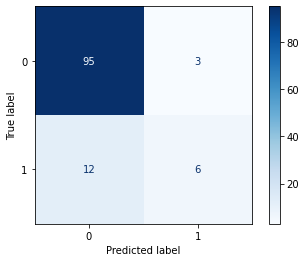

In [274]:
performance_results(X_train, y_train, bagged_predictions_train, X_test, y_test, bagged_predictions_test, bagged_tree)

In [276]:
#View the features of the first tree.
#rf_feature_importance_tree_1 = randomforest.estimators_[0]
#plot_feature_importances(rf_feature_importance_tree_1)

In [277]:
#Using GridSearch to improve the Random Tree model.
rfc = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rfc, X_train, y_train, cv=3))
round(mean_rf_cv_score, 3)

0.889

In [278]:
print('Before:')
print(y_train.value_counts()) 
print('\n')

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

print('After:')
print(pd.Series(y_train_resampled).value_counts()) 

Before:
0    396
1     65
Name: success, dtype: int64


After:
1    396
0    396
Name: success, dtype: int64


In [279]:
#Instansiate the model, select hyperparameters to run through, fit the model.
randomforest = RandomForestClassifier(max_depth=8, criterion='gini', n_estimators=8, max_features=8)
randomforest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=8, max_features=8, n_estimators=8)

In [280]:
#Make predictions on the model.
random_forest_train = randomforest.predict(X_train_resampled)
random_forest_test = randomforest.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       396
           1       0.97      1.00      0.98       396

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792

Train Set Accuracy: 0.9811
Train Set Recall: 0.9975
Train Set Precision: 0.9658
Train Set F1: 0.9814


Test Score Results
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        98
           1       0.47      0.39      0.42        18

    accuracy                           0.84       116
   macro avg       0.68      0.65      0.66       116
weighted avg       0.83      0.84      0.83       116

Test Set Accuracy: 0.8362
Test Set Recall: 0.3889
Test Set Precision: 0.4667
Test Set F1: 0.4242


Test Set Confusion Matrix


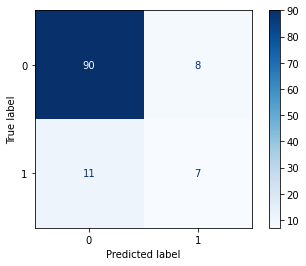

In [281]:
performance_results(X_train_resampled, y_train_resampled, random_forest_train, X_test, y_test,
                    random_forest_test, randomforest)

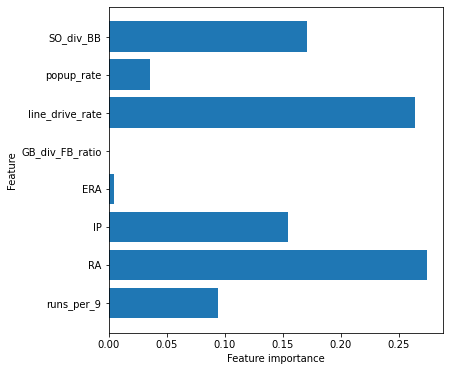

In [282]:
#View the features of the first tree.
rf_feature_importance_tree_1 = randomforest.estimators_[0]
plot_feature_importances(rf_feature_importance_tree_1)

In [283]:
from sklearn.model_selection import cross_val_score, GridSearchCV

#Using GridSearch to improve the Random Tree model.
rfc = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rfc, X_train_resampled, y_train_resampled, cv=3))
round(mean_rf_cv_score, 3)

0.919